## Hiring Opportunity for Minorities V2.4

### Goal:

Increasing access to job opportunities for minorities is crucial for reducing well- documented race, ethnicity gaps in the economy. 	

### Data Problem:

Bias Towards the Majority Class: Machine learning models, especially those that optimize for accuracy, may become biased toward predicting the majority class. A model can achieve a high accuracy simply by predicting the majority class for all samples, even though it fails to capture the minority class properly.
Example: In a dataset with 95% negative class and 5% positive class, a model that predicts "negative" for every instance would have 95% accuracy but would fail to identify any of the positive cases, which might be the most critical part of the problem (e.g., detecting fraud, rare diseases).

### Expected Results: 

The expected results of this project are the increase in the hiring opportunities for minotities (Hispanic and Black) people without sacrificing quality. That is, among applicants with the same predicted hiring potential the exploration will give opportunity to applicants in the minorities.

The project shows the models performance and compare the results against quantity of Hispanic and Black people from the dataset.

### Dataset

The dataset is sourced from Kaggle.
Link: https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data

This dataset provides insights into factors influencing hiring decisions. Each record represents a candidate with various attributes considered during the hiring process including ethnicity.


### Loading Libraries

In [3]:
# Base libraries
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Tools
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Classification models
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Different display
from IPython.display import display, HTML

# Balancing techniques 
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# Metrics
from sklearn.metrics import auc as skl_auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

import scikitplot as skplt
import matplotlib.ticker as mticker

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display="diagram")

### Data Analysis

The dataset contains 11 features and a target variable "HiringDecision", all columns are numeric except for Ethicity. There are not null values and no duplicates. The target class is not balanced, this is expecting because not every applicat is hired.

### Features

1. Age: Age of the candidate.
    Data Type: Integer.
2. Gender
    Categories: Male (0) or Female (1).
    Data Type: Binary.
3. Ethnicity: Ethnicity of the candidate.
    Categories:
    1: Black
    2: Asian
    3: White
    4: Hispanic
3. EducationLevel: Education level attained by the candidate.
    Categories:
    1: Bachelor's (Type 1)
    2: Bachelor's (Type 2)
    3: Master's
    4: PhD
    Data Type: Categorical.
4. ExperienceYears: Number of years of professional experience.
    Data Type: Integer.
5. PreviousCompanies: Number of previous companies where the candidate has worked.
    Data Type: Integer.
6. DistanceFromCompany: Distance in kilometers from the candidate's residence to the hiring company.
    Data Type: Float
7. Interview Score: Score achieved by the candidate in the interview process.
    Range: 0 to 100.
    Data Type: Integer.
8. SkillScore: Assessment score of the candidate's technical skills.
    Range: 0 to 100.
    Data Type: Integer.
9. PersonalityScore: Evaluation score of the candidate's personality traits.
    Data Range: 0 to 100.
    Data Type: Integer.
10. RecruitmentStrategy: Strategy adopted by the hiring team for recruitment.
    Categories:
    1: Aggressive
    2: Moderate
    3: Conservative
    Data Type: Categorical.
11. Hiring Decision (Target Variable): Outcome of the hiring decision.
    Categories:
    0: Not hired
    1: Hired
    Data Type: Binary (Integer).

In [6]:
recruitment_df = pd.read_csv('data/Job_Applicants_by_Ethnicity.csv')

In [8]:
recruitment_df.head()

,Age,Gender,EducationLevel,Ethnicity,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,Asian,0,3,26.783828,48,78,91,1,1
1,39,1,4,White,12,3,25.862694,35,68,80,2,1
2,48,0,2,White,3,2,9.920805,20,67,13,2,0
3,34,1,2,Asian,5,2,6.407751,36,27,70,3,0
4,30,0,1,Asian,6,1,43.105343,23,52,85,2,0


In [10]:
recruitment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1494 non-null   int64  
 1   Gender               1494 non-null   int64  
 2   EducationLevel       1494 non-null   int64  
 3   Ethnicity            1494 non-null   object 
 4   ExperienceYears      1494 non-null   int64  
 5   PreviousCompanies    1494 non-null   int64  
 6   DistanceFromCompany  1494 non-null   float64
 7   InterviewScore       1494 non-null   int64  
 8   SkillScore           1494 non-null   int64  
 9   PersonalityScore     1494 non-null   int64  
 10  RecruitmentStrategy  1494 non-null   int64  
 11  HiringDecision       1494 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 140.2+ KB


In [12]:
# Checking for null values
recruitment_df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
Ethnicity              0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [14]:
# Checking for duplicates 
# No duplicates
df_dups = recruitment_df[recruitment_df.duplicated()]
df_dups.shape

(0, 12)

### Correlation matrix

Encode the 'Ethnicity' feature before running the correlation matrix, as it is categorical.

As expected, the correlation matrix reveals a strong relationship between the hiring decision and factors such as:

Education level
Interview score
Skill score

However, what is concerning is the positive correlation with 'Ethnicity: Asian,' which may suggest a potential bias.

In [17]:
# OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Calling fit transform for recruiting.Ethinicity
encoded_ethnicity = encoder.fit_transform(recruitment_df[['Ethnicity']])

# Get the separate ethnicity columuns
ethnicity_columns = encoder.get_feature_names_out(['Ethnicity'])

# Convert the encoded array into a DataFrame
rec_encoded_df = pd.DataFrame(encoded_ethnicity, columns=ethnicity_columns)

# Concatenate the original DataFrame with the new encoded columns, excluding categorical column 'Ethnicity'
rec_encoded_df = pd.concat([recruitment_df.drop(columns=['Ethnicity']), rec_encoded_df], axis=1)

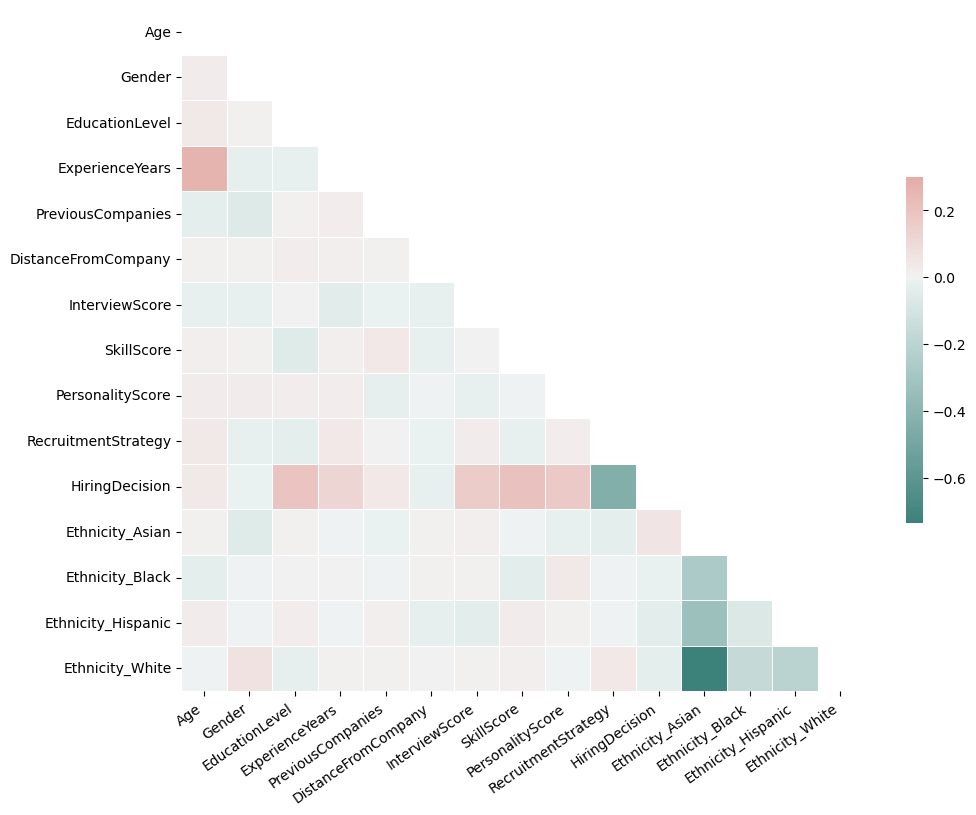

In [19]:
# Compute the correlation matrix
corr = rec_encoded_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Give the X labels some angle for easy reading
plt.xticks(rotation=35, ha='right')

plt.show()

In [21]:
# Statistics
recruitment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1494.0,36.737617,8.621503,20.000000,30.000000,37.000000,44.000000,58.000000
Gender,1494.0,0.491968,0.500103,0.000000,0.000000,0.000000,1.000000,1.000000
EducationLevel,1494.0,2.186078,0.861575,1.000000,2.000000,2.000000,3.000000,4.000000
ExperienceYears,1494.0,7.502677,4.652239,0.000000,3.250000,7.000000,12.000000,18.000000
PreviousCompanies,1494.0,3.002677,1.412789,1.000000,2.000000,3.000000,4.000000,5.000000
DistanceFromCompany,1494.0,25.487393,14.569860,1.031376,12.836794,25.502239,37.732849,50.992462
InterviewScore,1494.0,49.931727,28.438192,0.000000,25.000000,51.000000,74.000000,100.000000
SkillScore,1494.0,50.495315,29.161530,0.000000,25.000000,51.000000,76.000000,100.000000
PersonalityScore,1494.0,48.846720,29.088519,0.000000,23.000000,47.000000,74.750000,100.000000
RecruitmentStrategy,1494.0,1.893574,0.688669,1.000000,1.000000,2.000000,2.000000,3.000000


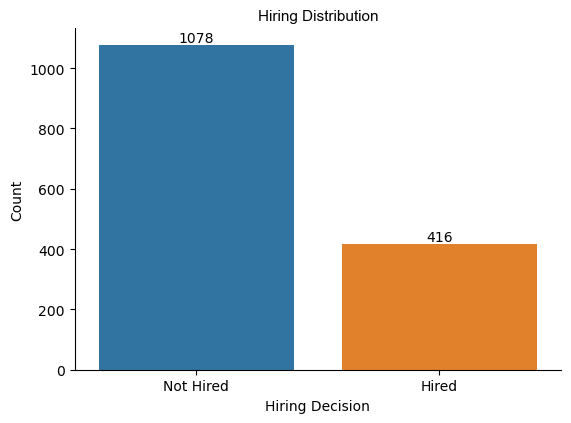

In [23]:
# Checking if the class is balanced
# Classes are not balanced
fig = sns.catplot(x = 'HiringDecision', kind = 'count', data = recruitment_df)
fig.fig.set_size_inches(6, 4)
plt.xticks([0, 1], ['Not Hired', 'Hired'])
for fig in fig.axes.flat:
    fig.bar_label(fig.containers[0])
plt.title('Hiring Distribution', fontdict={'family': 'arial', 'size': 11})
plt.xlabel('Hiring Decision')
plt.ylabel('Count')
plt.show()

### Plotting the ethnicity from the dataset

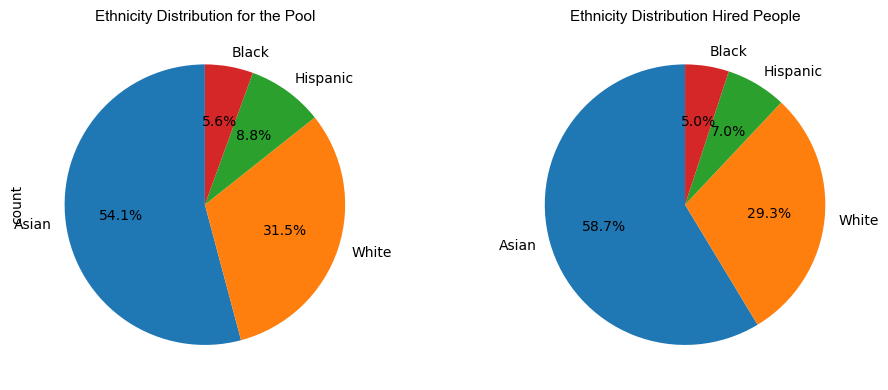

In [26]:
# Plotting the ethnicity from the dataset
# Ethnicity distribution
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
fig.supylabel('')

# Ethnicity whole pool
recruitment_df.Ethnicity.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax = ax[0])
ax[0].set_title('Ethnicity Distribution for the Pool', fontdict={'family': 'arial', 'size': 11})

# Ethnicity from people who got hired
ax[1].set_title('Ethnicity Distribution Hired People', fontdict={'family': 'arial', 'size': 11})
recruitment_df[recruitment_df['HiringDecision'] == 1]['Ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1])
plt.tight_layout()
plt.ylabel('')
plt.show()

### Functions Definition

In [29]:
# This function shows a bar graph of the metrics
def metrics_bar(metrics_df):
    # Param: Metrics values on a df
    # Returns: Graph with the metrics on the metrics_df 
    
    # Define the list of metrics and the models
    metrics = ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'ROC']
    models = metrics_df['Model']

    # Set the width of each bar and the figure size
    bar_width = 0.1
    fig, ax = plt.subplots(figsize=(15, 4))

    # Loop over each metric and create a bar for each model
    for i, metric in enumerate(metrics):
        ax.bar(models.index + i * bar_width, metrics_df[metric], width=bar_width, label=metric)

    # Set labels and title
    ax.set_xlabel('Model')
    ax.set_ylabel('Metric Value')
    ax.set_title('Comparison of Model Performance Metrics')
    ax.set_xticks(models.index + bar_width * (len(metrics) / 2))  # Center x-ticks
    ax.set_xticklabels(models)

    # Add legend and show plot
    ax.legend()
    #plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

In [31]:
# This function tracks back the applicanst from the predictions
def pie_counts(predictions, X):
    # Params: predictions = y_preds
    #         X = X_test or X_train
    # Returns: A dataframe with the hired ethnicity counts
    # Convert y_preds to a DataFrame for merging
    y_preds_df = pd.DataFrame(predictions, index=X.index, columns=['HiringDecision'])
    
    # Merge predictions with the test set to include ethnicity
    test_with_preds = pd.concat([y_preds_df, recruitment_df.loc[X.index, 'Ethnicity']], axis=1)

    # Filter for hired people based on prediction
    hired_people = test_with_preds[test_with_preds['HiringDecision'] == 1]

    # Count the ethnicity distribution among hired individuals
    hired_ethnicity_counts = hired_people['Ethnicity'].value_counts()
    
    return hired_ethnicity_counts

### Business Objective

Reduce the bias in the models against Black and Hispanic in the hiring process without sacrificing quality by considering the most optimistic assessment of their hiring potential. That is, among applicants with **the same predicted hiring potential** the exploration will give opportunity to applicants in the minorities.


In [34]:
# Calling OneHotEncoder for Ethnicity, scaled the rest of the columns   
transformer = make_column_transformer((OneHotEncoder(), ['Ethnicity']),
                                       remainder = StandardScaler())

In [36]:
X = recruitment_df.drop('HiringDecision', axis = 1)
y = recruitment_df['HiringDecision']

In [38]:
# Calling train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### A Baseline Model

    - Creating a baseline with LogisticRegession passign the default parameters
    - Getting accuracy for baseline

In [43]:
# Pipeline for the baseline
# Pipeline calls the transformer and the LogisticRegression 
lrg_pipe = Pipeline([
    ('transformer', transformer),
    ('lrg', LogisticRegression(max_iter = 10000, class_weight = 'balanced'))
])

In [45]:
# Calling LogisticRegression with default parameters
# Fitting the model
lrg_pipe.fit(X_train, y_train)

# Getting the predictions for train and test data
train_preds = lrg_pipe.predict(X_train)
test_preds = lrg_pipe.predict(X_test)

# Getting the accuracy
accuracy = accuracy_score(y_test, test_preds)
# Printing the accuracy for the base model
print(f"\033[1mBase Model Accuracy Basic Logistic Regression: {accuracy:.2f}\033[0m")

Base Model Accuracy Basic Logistic Regression: 0.81


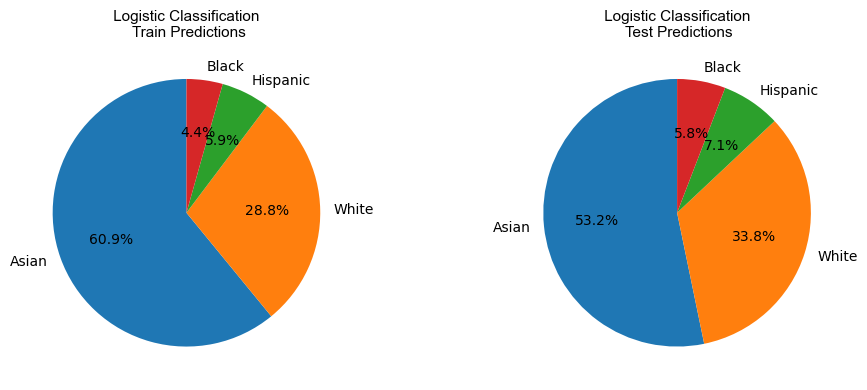

In [47]:
# Plotting the ethnicity counts for the base model
# Get the counts from pie_counts
eth_counts_train = pie_counts(train_preds, X_train)
eth_counts_test = pie_counts(test_preds, X_test)

# Plotting the pies
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

# Ethnicity train predictions
eth_counts_train.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax = ax[0])
ax[0].set_title(f' Logistic Classification \n Train Predictions', fontdict={'family': 'arial', 'size': 11})
ax[0].set_ylabel('')

# Ethnicity test predictions
ax[1].set_title(f' Logistic Classification \n Test Predictions', fontdict={'family': 'arial', 'size': 11})
eth_counts_test.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1])
ax[1].set_ylabel('')

# Making a tight layaout for better presentation
plt.tight_layout()
plt.show()

### Second model using logit LASSO with LogisticRegression

In [50]:
# Defining the lasso pipeline
lasso_pipe = Pipeline([
    ('transformer', transformer),
    ('lasso', LogisticRegression(penalty='l1', solver='liblinear', C=0.9, max_iter = 10000, class_weight= 'balanced', random_state = 42))
])

In [52]:
# Initialize the Logistic Regression model with L1 (LASSO) penalty
lasso_pipe.fit(X_train, y_train)

# Getting predictions
train_preds = lasso_pipe.predict(X_train)
test_preds = lasso_pipe.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, test_preds)
print(f"\033[1mSecond Model Accuracy Logit LASSO: {accuracy:.2f}\033[0m")

Second Model Accuracy Logit LASSO: 0.81


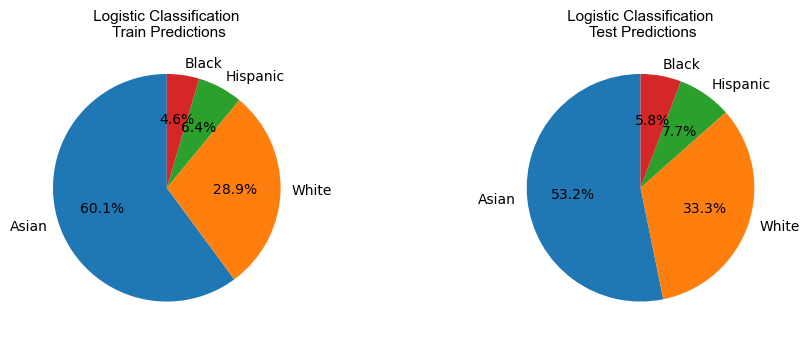

In [54]:
# Plotting the ethnicity counts for the Lasso model
# Get the counts from pie_counts
eth_counts_train = pie_counts(train_preds, X_train)
eth_counts_test = pie_counts(test_preds, X_test)

# Plotting the pies
fig, ax = plt.subplots(1, 2, figsize = (10, 3.5))

# Ethnicity train predictions
eth_counts_train.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax = ax[0])
ax[0].set_title(f' Logistic Classification \n Train Predictions', fontdict={'family': 'arial', 'size': 11})
ax[0].set_ylabel('')

# Ethnicity test predictions
ax[1].set_title(f' Logistic Classification \n Test Predictions', fontdict={'family': 'arial', 'size': 11})
eth_counts_test.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[1])
ax[1].set_ylabel('')

# Making a tight layaout for better presentation
plt.tight_layout()
plt.show()

### Techniques to Handle Imbalanced Classes

1. Resampling
   
    - Oversampling the minority class: This involves creating duplicates or synthetically generating more samples of the minority class to balance the dataset. The most common technique is SMOTE (Synthetic Minority Over-sampling Technique)
  
   - Undersampling the majority class: This involves reducing the number of samples from the majority class to balance the dataset. This can lead to loss of important information if done aggressively.

2. Adjusting Class Weights.  Many machine learning algorithms, such as Logistic Regression, SVM, and Random Forest, allow you to assign higher weights to the minority class during training. This penalizes the model more for misclassifying minority class samples and forces it to focus on both classes.

### Comparing models

Defined a function called comparing_models the function accepts X, y, the balancing method, models, and parameters for the grid. The function returns the information on the predictions for Ethnicity, best models, and probabilities.

Balancing methods: SMOTE, Under Sampling, and Balacing Weights.
Algorithms: Logistic Regression, SVC, Decision Tree, and Random Forest.

Parameters and algorithms could be replaced before calling the function.

In [58]:
# Dataframe to track metrics
metrics_df = pd.DataFrame(columns=['Model', 'Mean Fit Time',
                                            'Train Accuracy', 'Test Accuracy',
                                            'Train Precision', 'Test Precision',
                                            'Train Recall', 'Test Recall',
                                            'ROC'])

### Defining the models and their parameters for the function comparing_models, the list could be expand and reduce.

In [70]:
# Models to compare, notice the all models here are useing class_weight='balanced'
models = {
        'Logistic': LogisticRegression(class_weight='balanced', random_state = 42),
         'SVC': SVC(probability=True, class_weight='balanced', random_state = 42),
         'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state = 42),
         'Random Forest': RandomForestClassifier(class_weight='balanced', random_state = 42)
    }
# Paramters for grid search
params = {
    'Logistic': {'model__C': [0.05, 0.1, 0.105, 0.2],
                 'model__penalty': ['l1', 'l2','elasticnet'],
                 'model__solver': ['lbfgs', 'saga']},
    'SVC': {'model__C': [1, 10, 11], 'model__kernel': ['model__linear', 'rbf', 'poly'],
            'model__gamma': ['scale', 'auto'],'model__degree': [2, 3, 5]},
    'Decision Tree': {'model__max_depth': [3, 5, 10, 11, None], 'model__min_samples_split': [2, 3, 5, 10],
                      'model__criterion': ['gini', 'entropy'], 'model__min_samples_leaf': [1, 2, 4, 5]},
    'Random Forest': {'model__n_estimators': [10, 20, 50, 100], 'model__max_depth': [2, 3, 5, 10, None],
                      'model__max_features': ['sqrt']}
}

### Main function

In [73]:
# Main Function - comparing models passed as paramters depending on the balancing method
def comparing_models(X, y, balancing_method, models, params):
    # Parameters:
    # X, y to split the data
    # Balancing method: SMOTE, Under_Sampling, Balancing_Weights
    # Models to compare
    # Parameters for the models to be used in the grid search
    # Returns: 
    #         - The pie_params - Train and test prediction per model - Type: Dictionary
    #         - The best_models - Grid best estimator per model - Type: Dictionary
    #         - The model_probs - Model probabilities - Type: Dictionary
    # Dict returning variables
    pie_params = {}
    best_models = {}
    model_probs = {}
    
    # Loop over the models
    for model_name, model in models.items():
        print(f"\n\033[1mClassification with {model_name}:\033[0m\n{'-' * 30}")

        #Check for the balacing method passed as param
        if balancing_method == 'SMOTE' :
            pipe = Pipeline([
                ('transformer', transformer),
                ('smote', SMOTE(random_state=42)),
                ('model', model)
            ])
        # Check for under sampling 
        elif balancing_method == 'Under_Sampling':
            pipe = Pipeline([
                ('transformer', transformer),
                ('u_sampling', RandomUnderSampler(random_state=42)),
                ('model', model)
            ])
        # Last option is balacing weights, also the option by default
        else :
            pipe = Pipeline([
                ('transformer', transformer),
                ('model', model)
            ])
        
        # Grid
        grid = GridSearchCV(estimator = pipe, 
                                   param_grid=params[model_name], 
                                   scoring='accuracy', 
                                   cv=5)
        # Fitting the model
        grid.fit(X_train, y_train)

        # Getting predictions
        preds_train = grid.predict(X_train)
        preds_test = grid.predict(X_test)

        # Calculating accuracy
        accuracy_test = accuracy_score(y_test, preds_test)
        accuracy_train = accuracy_score(y_train, preds_train)

        # Calculating precision
        precision_test = precision_score(y_test, preds_test)
        precision_train = precision_score(y_train, preds_train)

        # Calculating recall
        recall_test = recall_score(y_test, preds_test)
        recall_train = recall_score(y_train, preds_train)

        # Calculating ROC
        y_probs = grid.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        # Best params for the models
        grid_best_params = grid.best_params_
        
        #grid_best_score = grid.best_score_(X_test, y_test)
        grid_best_estimator = grid.best_estimator_

        #Getting Results
        grid_score = grid.score(X_test, y_test)
        
        # Getting fit time 
        best_index = grid.best_index_
        results_mean_fit_time = grid.cv_results_['mean_fit_time'][best_index]
        #classification_report = classification_report(y_test, preds_test)

        # Return variables
        # pie_params is used to generate the pit graphs
        pie_params[model_name] = (preds_test, preds_train)
        #best_models is used to generate the permutation_importance
        best_models[model_name] = (grid_best_estimator)
        # Probabilities for Lift curve
        y_prob = grid.predict_proba(X_test)
        model_probs[model_name] = (y_prob)

        # Printing the best parameters for the models
        print(f'Best Params: {grid_best_params}')

        # Adding the metrics to the metrics dataframe
        metrics_df.loc[len(metrics_df)] = [model_name, results_mean_fit_time, accuracy_train, accuracy_test,
                                          precision_train, precision_test, recall_train, recall_test, roc_auc]
    return pie_params, best_models, model_probs

### SMOTE - Synthetic Minority Over-sampling Technique

1. Showing the results for the models passing as balacing method SMOTE
2. First showing the best parameters for the models
3. Next, the metrics comparation:
   - Random forest has the highest ROC value of 0.89 followed by SVC with 0.87
   - Showing the train and test results for accuracy, precision and recall
   - The fastest model was Logistic Regression with 0.006
4. Followed by the grap of the metrics by model
5. Lastly, the graph pies show how the participation of Black and Hispanic people was increased with SMOTE

In [76]:
# Calling the function for SMOTE
smote_graph_pies = {}
smote_best_models = {}
smote_model_probs = {}
metrics_df = metrics_df.iloc[0:0]
smote_graph_pies, smote_best_models, smote_model_probs = comparing_models(X, y, 'SMOTE', models, params)


Classification with Logistic:
------------------------------
Best Params: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'saga'}

Classification with SVC:
------------------------------
Best Params: {'model__C': 1, 'model__degree': 2, 'model__gamma': 'auto', 'model__kernel': 'rbf'}

Classification with Decision Tree:
------------------------------
Best Params: {'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}

Classification with Random Forest:
------------------------------
Best Params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 50}


In [514]:
# Desplay metrics sorted by ROC ascending
metrics_df.sort_values(by = 'ROC', ascending = False)

,Model,Mean Fit Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,ROC
3,Random Forest,0.051007,0.998086,0.895323,1.000000,0.842593,0.993220,0.752066,0.892297
1,SVC,0.072186,0.912919,0.853007,0.816770,0.713178,0.891525,0.760331,0.874345
2,Decision Tree,0.006066,0.957895,0.877506,0.946619,0.811321,0.901695,0.710744,0.865388
0,Logistic,0.007842,0.817225,0.808463,0.636842,0.612903,0.820339,0.785124,0.858068


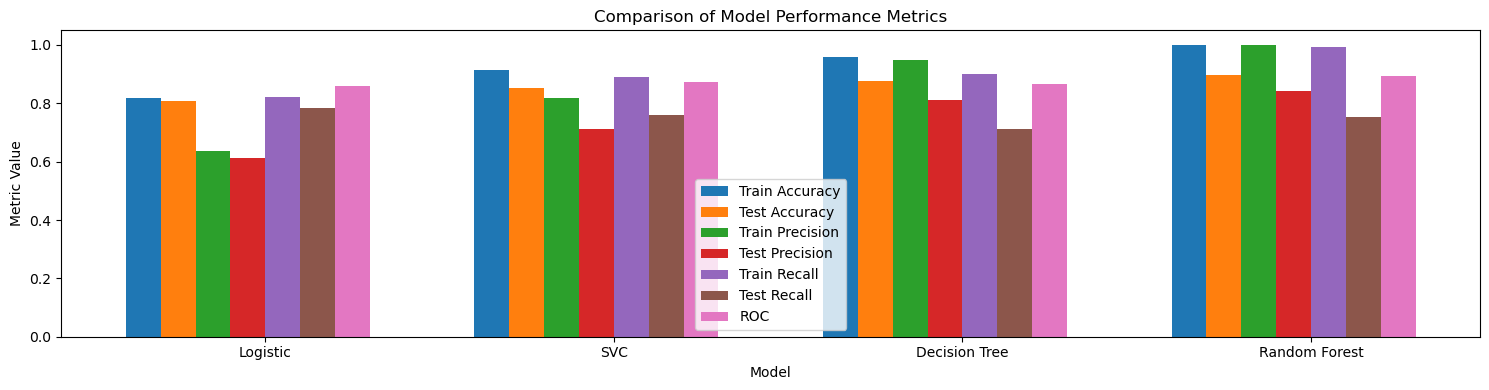

In [515]:
metrics_bar(metrics_df)

In [516]:
# This function plot the pipes for each model given the balancing method
def plotting_pies(graph_pies, method):
    # Params: grahp_pies - Has the ethnicity train and test predictions - Type: Dictionary
    #         method - Balancing method
    fig, ax = plt.subplots(4, 2, figsize = (12, 11))
    
    #Ethnicity labels
    labels = ['Asian', 'White', 'Hispanic', 'Black']
    
    i = 0
    ax = ax.flatten()
    for model in list(graph_pies.keys()):
        # Getting the ethnicity counts
        eth_counts_train = pie_counts(graph_pies[model][1], X_train)
        eth_counts_test = pie_counts(graph_pies[model][0], X_test)
        
        # Ethnicity for train predictions
        ax[i].pie(eth_counts_train, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
        ax[i].set_title(f' {model} with {method} \n Train Predictions', fontdict={'family': 'arial', 'size': 11})
        ax[i].legend(labels = labels, title="Ethnicity", loc="center left", bbox_to_anchor=(1.33, 0.5))

        # Ethnicity for test predictions
        ax[i+1].set_title(f' {model} with {method} \n Test Predictions', fontdict={'family': 'arial', 'size': 11})
        ax[i+1].pie(eth_counts_test, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
        i += 2

    # This makes the graph concise
    plt.tight_layout()
    plt.show()

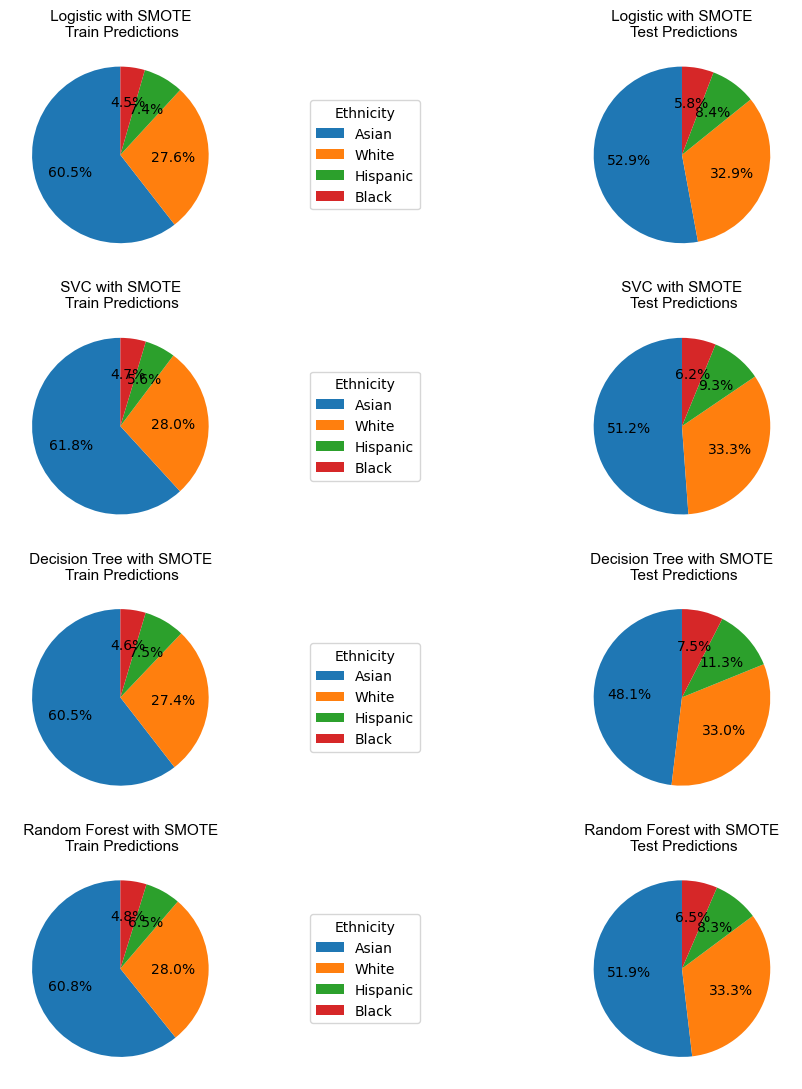

In [517]:
plotting_pies(smote_graph_pies, 'SMOTE')

### Under Sampling

1. Showing the results for the models passing as balacing method Under-Sampling
2. First showing the best parameters for the models
3. Next, the metrics comparation:
    - Random forest has the highest ROC value of 0.88 followed by Logistic Regression with 0.86
    - Showing the train and test results for accuracy, precision and recall
    - The fastest model was Decision Tree with 0.003
4. Followed by the grap of the metrics by model
5. Lastly, the graph pies show how the participation of Black and Hispanic people was increased with SMOTE

In [79]:
# Calling Under_Sampling
usampling_graph_pies = {}
usampling_bmodels = {}
metrics_df = metrics_df.iloc[0:0]
usampling_graph_pies, usampling_bmodels, usampling_model_probs = comparing_models(X, y, 'Under_Sampling', models, params)


Classification with Logistic:
------------------------------
Best Params: {'model__C': 0.105, 'model__penalty': 'l1', 'model__solver': 'saga'}

Classification with SVC:
------------------------------
Best Params: {'model__C': 1, 'model__degree': 3, 'model__gamma': 'auto', 'model__kernel': 'poly'}

Classification with Decision Tree:
------------------------------
Best Params: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}

Classification with Random Forest:
------------------------------
Best Params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


In [520]:
metrics_df.sort_values(by = 'ROC', ascending = False)

,Model,Mean Fit Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,ROC
3,Random Forest,0.058471,0.964593,0.861915,0.888554,0.712230,1.000000,0.818182,0.880493
0,Logistic,0.003103,0.809569,0.801782,0.623077,0.600000,0.823729,0.793388,0.857463
2,Decision Tree,0.002901,0.899522,0.839644,0.772989,0.662252,0.911864,0.826446,0.857173
1,SVC,0.013814,0.894737,0.837416,0.774481,0.679104,0.884746,0.752066,0.856027


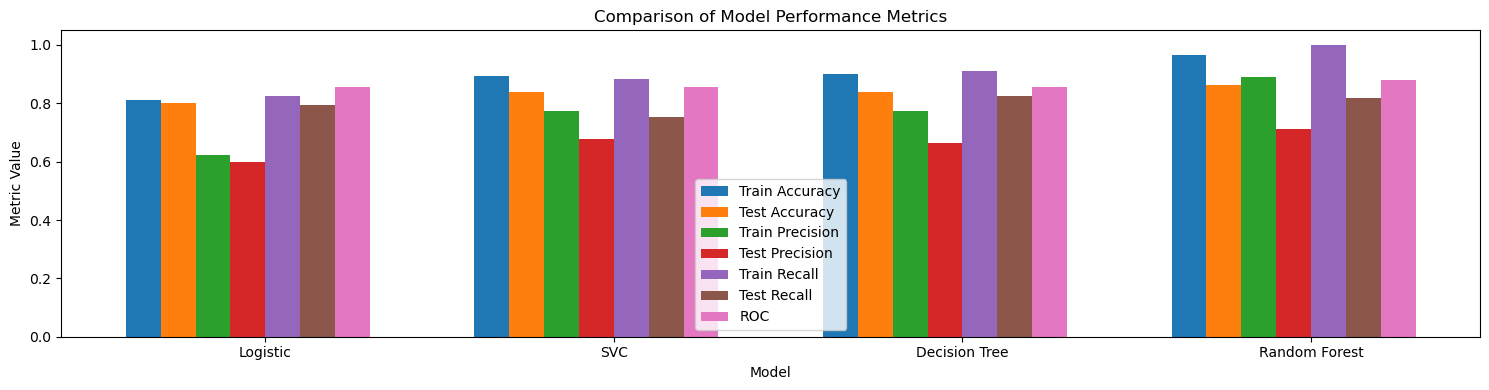

In [521]:
metrics_bar(metrics_df)

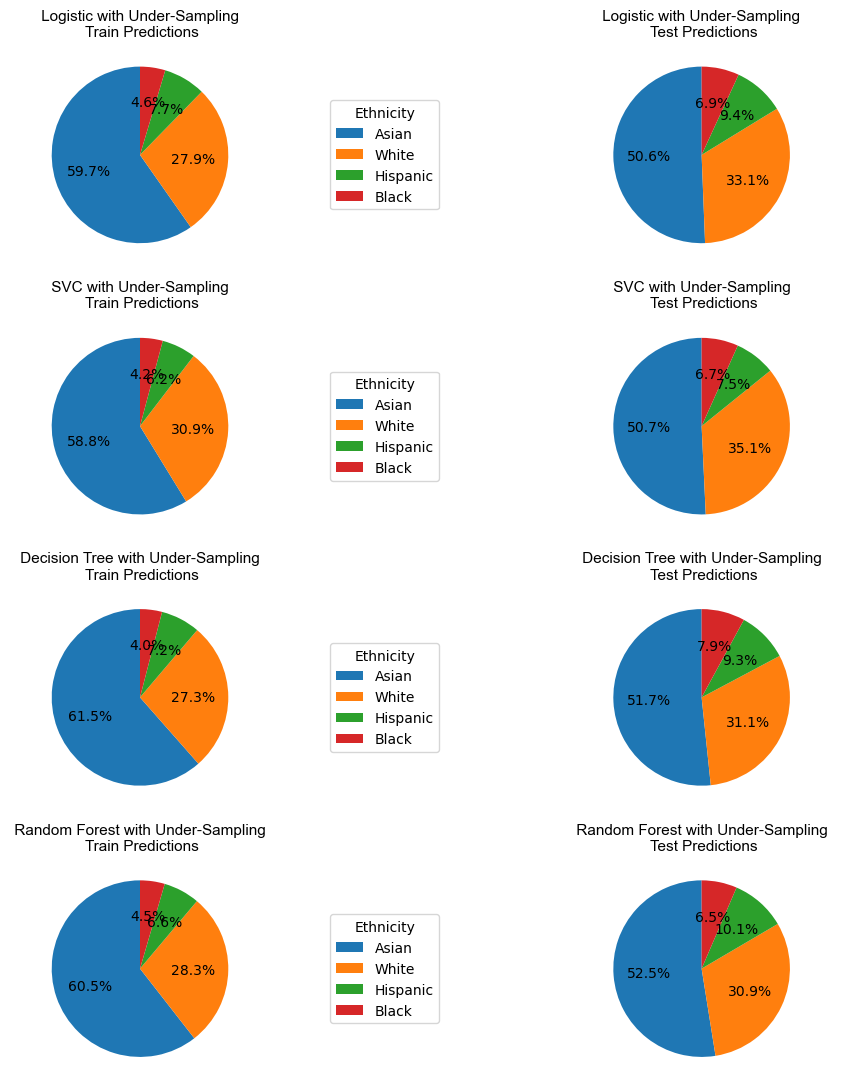

In [522]:
plotting_pies(usampling_graph_pies, 'Under-Sampling')

### Balancing_Weights

1. Showing the results for the models passing as balacing method Balacing Weights
2. First showing the best parameters for the models
3. Next, the metrics comparation:
   - Random forest has the highest ROC value of 0.89 followed by SVC with 0.86
   - Showing the train and test results for accuracy, precision and recall
   - The fastest model was Decision Tree Classification with 0.003
4. Followed by the grap of the metrics by model
5. Lastly, the graph pies show how the participation of Black and Hispanic people was increased with Balancing Weights

In [82]:
balancing_graph_pies = {}
balancing_bmodels = {}
metrics_df = metrics_df.iloc[0:0]
balancing_graph_pies, balancing_bmodels, balancing_model_probs = comparing_models(X, y, 'Balancing_Weights', models, params)


Classification with Logistic:
------------------------------
Best Params: {'model__C': 0.2, 'model__penalty': 'l1', 'model__solver': 'saga'}

Classification with SVC:
------------------------------
Best Params: {'model__C': 1, 'model__degree': 3, 'model__gamma': 'auto', 'model__kernel': 'poly'}

Classification with Decision Tree:
------------------------------
Best Params: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}

Classification with Random Forest:
------------------------------
Best Params: {'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


In [525]:
metrics_df.sort_values(by = 'ROC', ascending = False)

,Model,Mean Fit Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,ROC
3,Random Forest,0.062282,0.937799,0.886414,0.868590,0.773438,0.918644,0.818182,0.888581
1,SVC,0.035610,0.920574,0.857461,0.848684,0.743590,0.874576,0.719008,0.863233
0,Logistic,0.003818,0.814354,0.806236,0.628499,0.608974,0.837288,0.785124,0.857917
2,Decision Tree,0.003471,0.915789,0.868597,0.832797,0.750000,0.877966,0.768595,0.857577


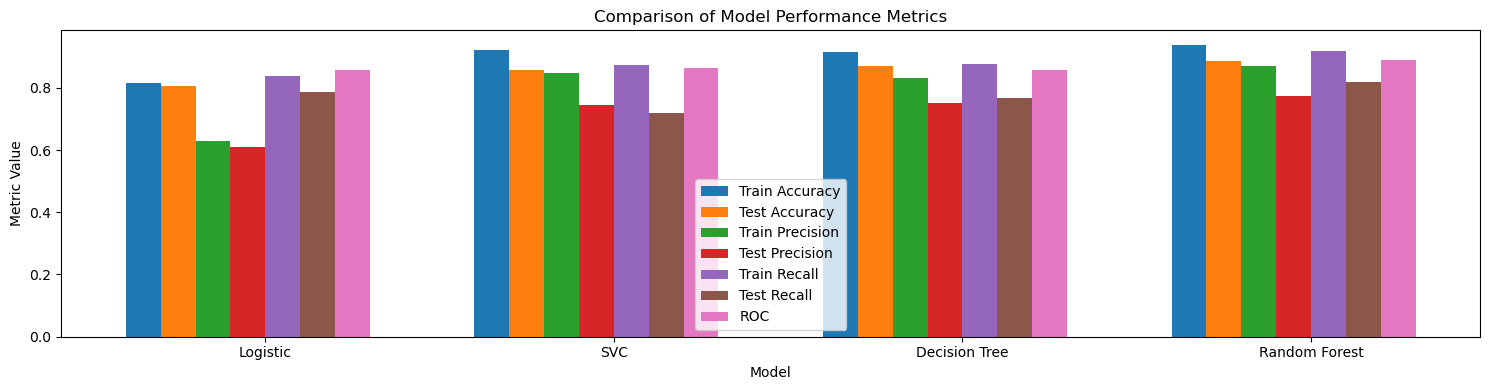

In [526]:
metrics_bar(metrics_df)

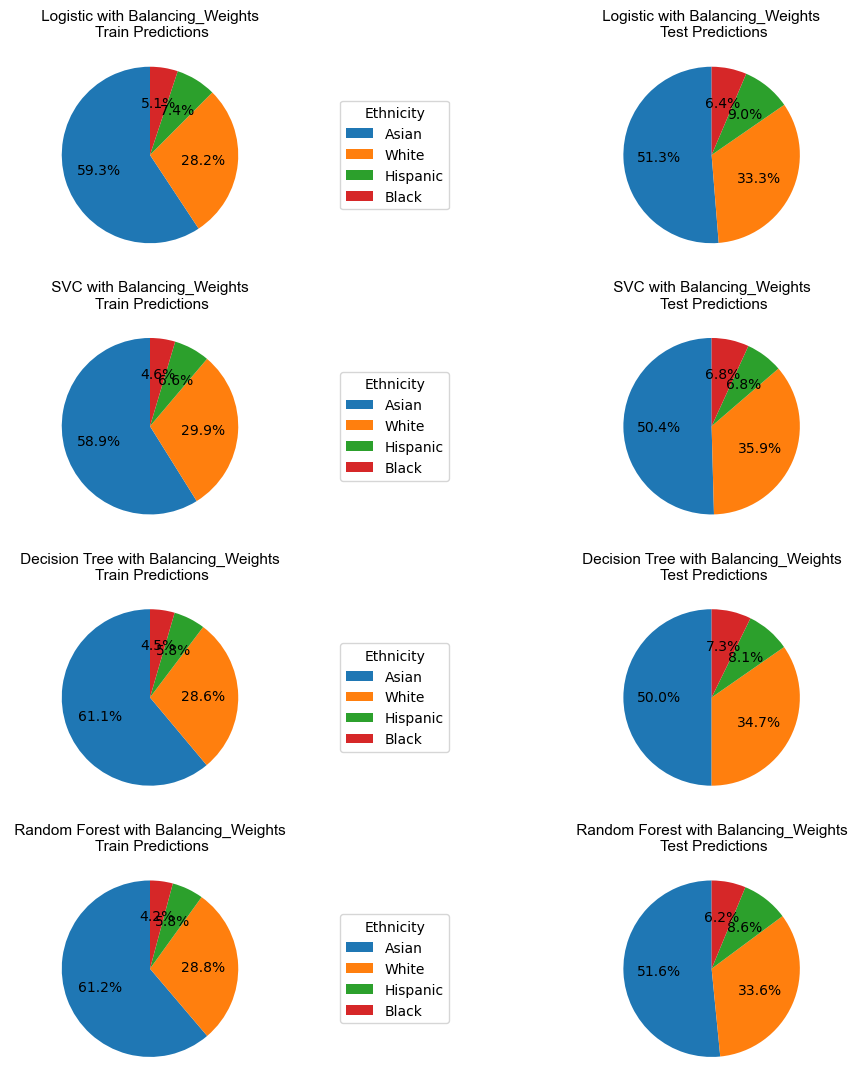

In [527]:
plotting_pies(balancing_graph_pies, 'Balancing_Weights')

### Most Important Features

This shows the features permutation importance for each best model on a balancing method
The most significat features for the models are: RecruitmentStrategy, SkillScore, InterviewScore, EducationLevel, PersonalityScore, and ExperienceYears

In [529]:
smote_best_models['Logistic']

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Ethnicity'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [530]:
# This function calculates the features permutation importance from the best models
def feature_importance(best_models):
    # Params: Best_models - grid best estimator per model - Type: Dictionary
    # Fit models and plot permutation importance
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()  # Flatten axes array for easy indexing

    for i, (name, model) in enumerate(best_models.items()):    
        # Calculate permutation importance
        r1 = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    
        # Sort features by importance
        feature_names_per_graph = ''
        feature_names_per_graph = X_train.columns if hasattr(X_train, 'columns') else range(X_train.shape[1])

        # Sorted bu importance's mean
        sorted_idx = np.argsort(r1.importances_mean)
        sorted_feature_names = [feature_names_per_graph[i] for i in sorted_idx]
        sorted_importances = r1.importances_mean[sorted_idx]
   
        # Plotting
        axes[i].barh(sorted_feature_names, sorted_importances)
        axes[i].set_title(f'Permutation Importance for {name}')
        axes[i].set_xlabel("Mean Importance")

    plt.tight_layout()
    plt.show()

#### SMOTE Feature Importance

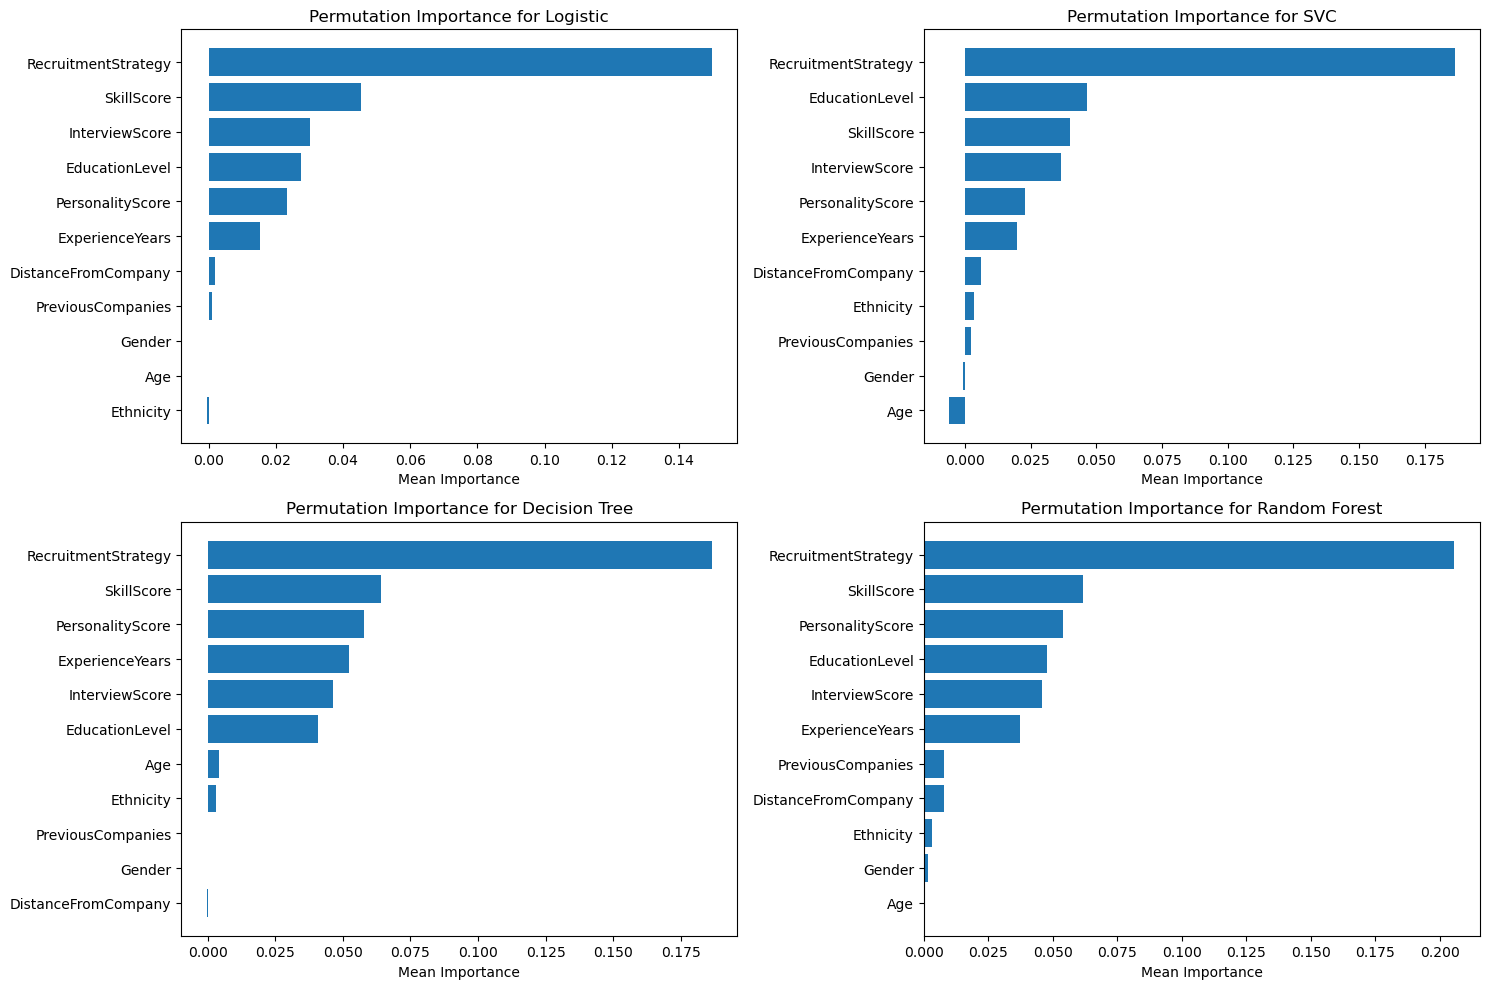

In [531]:
feature_importance(smote_best_models)

#### Under Sampling Feature Importance

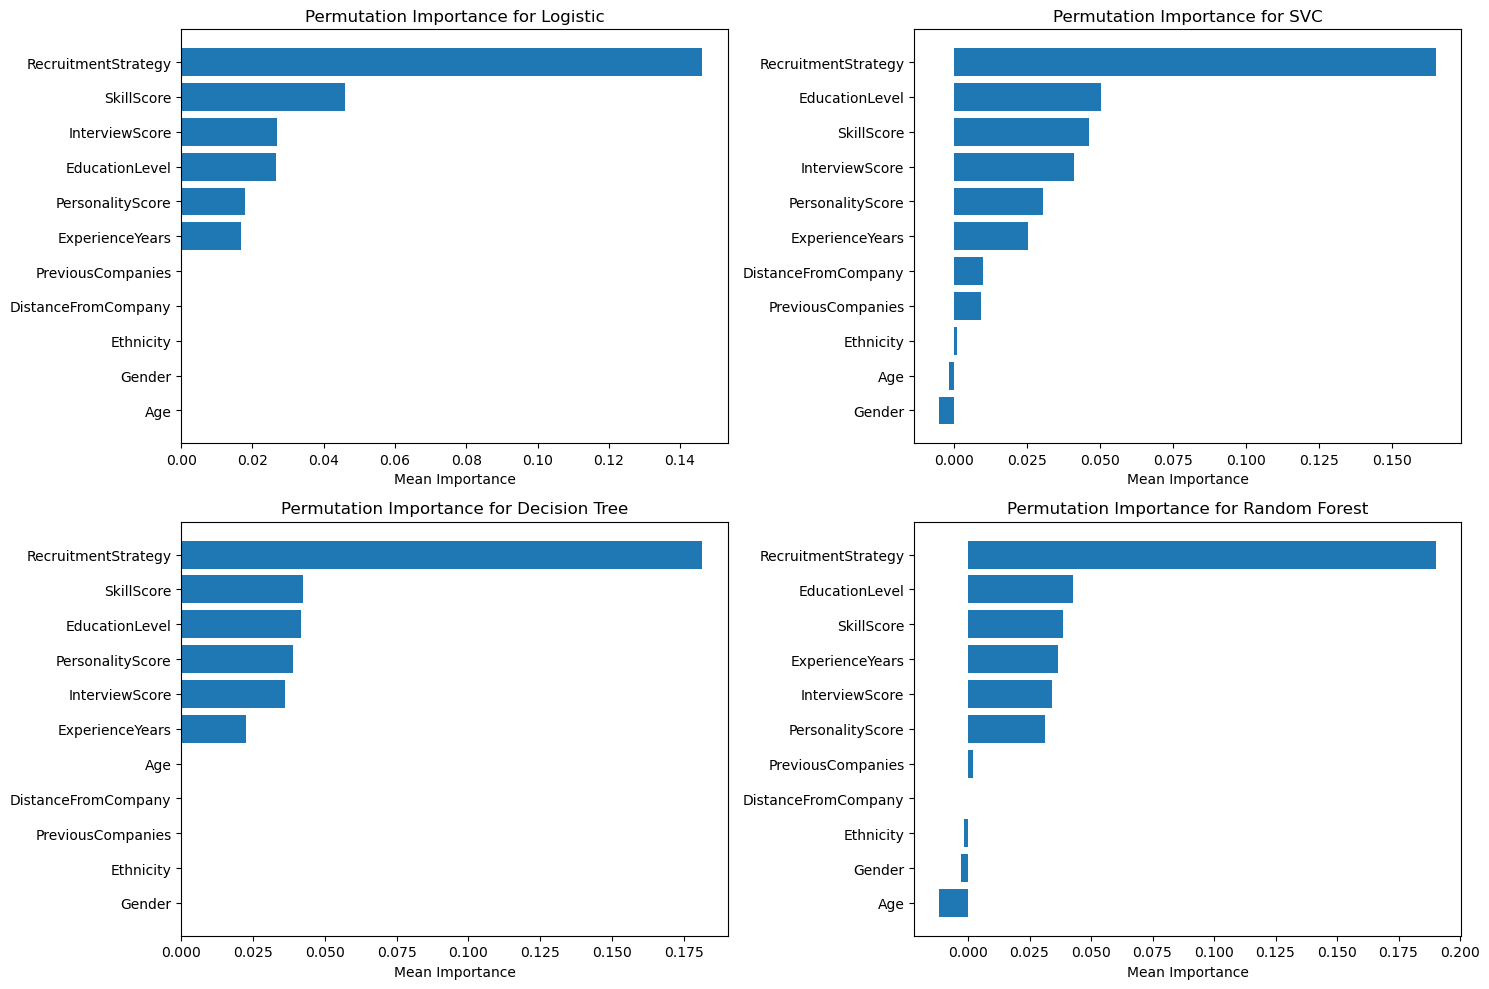

In [532]:
feature_importance(usampling_bmodels)

#### Balancing Weights Feature Importance

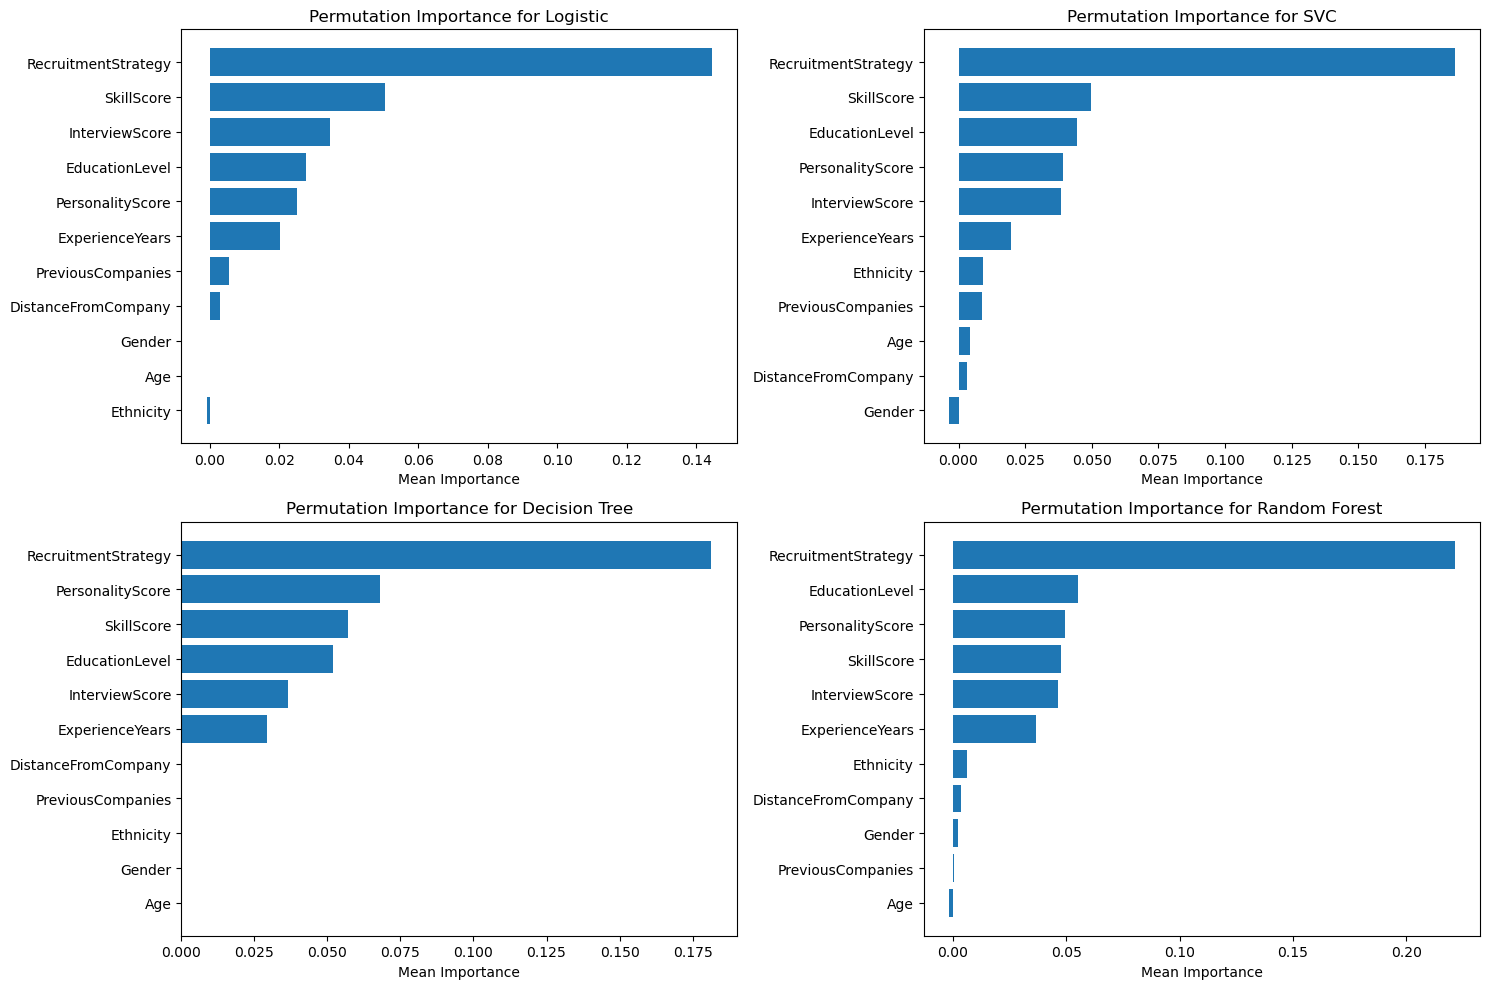

In [533]:
feature_importance(balancing_bmodels)

### Adjusting the performance metrics

So far fit time, accuracy, precision, and recall and ROC are the metrics to compare the models. Now Lift will be used adjusting the metrics.

Cumulative Gain Curves, or **Lift Charts**, are considered a better metric for marketing campaigns in classification models for several reasons, especially in scenarios where the objective is to target the most responsive or valuable segments of a population.

The **Cumulative Gain Curve** shows how well the model can rank instances in order of their likelihood to respond positively (e.g., get hired).

On the other hand **The ROC Curve** (Receiver Operating Characteristic curve) is a useful metric for marketing campaigns in classification models because it helps evaluate the model's ability to distinguish between classes (e.g., potential hires vs no-hires) across different decision thresholds. Here’s why the ROC is valuable in this context.

The ROC curve plots the True Positive Rate (TPR) (also called sensitivity or recall) against the False Positive Rate (FPR) at various classification thresholds. 

Next, **The Lift Curve** is derived from the cumulative gains chart; the values on the y axis correspond to the ratio of the cumulative gain for each curve to the baseline. Thus, the lift at 10% for the category Yes is 50%/10% = ~5.0 for most models. It provides another way of looking at the information in the cumulative gains chart.

Plotting **The Calibration Curves** of a classifier is useful for determining whether or not you can interpret their predicted probabilities directly as a confidence level. For instance, a well-calibrated binary classifier should classify the samples such that for samples to which it gave a score of 0.8, around 80% should actually be from the positive class.

Finally **The Confusion Matrix** for each model shows the values for TP, FP and FN, in this case the idea is to increase the number of people in the campaign that will say Yes and reduce the number of calls.


In [85]:
# This function compute cumulative gains manually
def cumulative_gain_curve(y_true, y_prob):
    # Param: y_true values, and y_probabilities 
    # Return: The pecentages and the gain
    
    # Sort true labels by the probability of the positive class
    y_true = np.array(y_true)
    indices = np.argsort(-y_prob[:, 1])
    y_true_sorted = y_true[indices]

    # Calculate the cumulative sum of positives and total instances
    total_positives = np.sum(y_true == 1)
    cum_positives = np.cumsum(y_true_sorted)
    gain = cum_positives / total_positives

    # Append 0 at the start for plotting from the origin
    gain = np.insert(gain, 0, 0)

    # Percentage of instances considered
    percentages = np.arange(len(gain)) / len(y_true)

    return percentages, gain

In [172]:
# Function to plot the cumulative gain curve and the ROC curve
def adjusted_metrics(model_probs, best_models):
    #Params: The model probalibities model_probs
    #  and the best models from the GridSerachCV
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    plt.xticks(np.arange(0.0, 1.1, 0.1))
    plt.yticks(np.arange(0.0, 1.1, 0.1))

    # Cumulative Gain Curves
    for i, (name, y_prob) in enumerate(model_probs.items()):
        # Calling the function to calculate cumulative gains and percentages
        percentages, gains = cumulative_gain_curve(y_test, y_prob)
        # Plot the Cumulative Gains
        ax[0].plot(percentages, gains, label=f'{name} (AUC: {np.trapz(gains, percentages):.2f})')

    # Plotting parameters
    # Plotting the baseline
    ax[0].plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
    # Arange the labels for a proper visualization 
    ax[0].set_xticks(np.arange(0.0, 1.1, 0.1))
    ax[0].set_yticks(np.arange(0.0, 1.1, 0.1))
    ax[0].set_xlabel('Percentage of Population')
    ax[0].set_ylabel('Cumulative Gain')
    ax[0].set_title('Cumulative Gain Curves for The Models')
    ax[0].legend(loc='lower right')
    ax[0].grid(True)

    # ROC 
    for i, (name, model) in enumerate(best_models.items()):    
        # Calcualting the probabilities for the model
        y_pred_prob = model.predict_proba(X_test)[:, 1] 

        # Calculating the AUC from y_test, and the probabilies on X_test
        auc = roc_auc_score(y_test, y_pred_prob)

        # Plottoing the ROC, passing the auc and the model names
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax = ax[1], label = f'{name} AUC: {auc:.2f}')

    # Plotting the base line for the ROC curves
    plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
    plt.title('ROC Curves for the Best Predicting Models')
    plt.legend();
    plt.grid()
    plt.show()
    y_prob

#### SMOTE Cumulative Gain Curves & ROC Curves

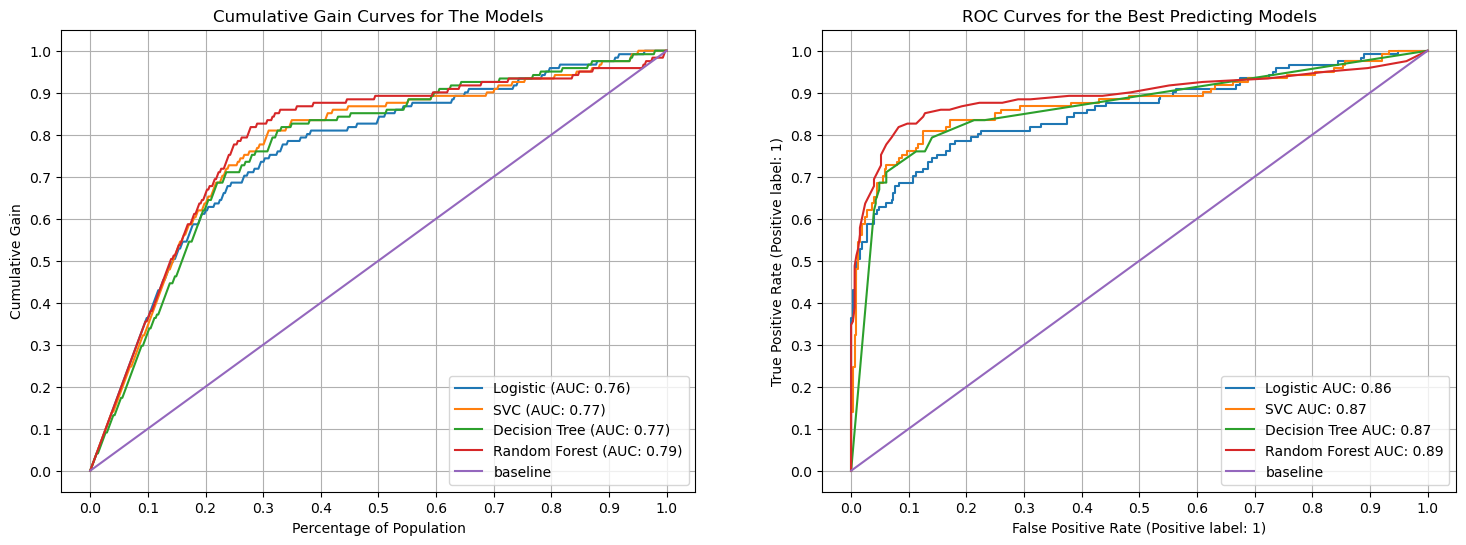

In [174]:
adjusted_metrics(smote_model_probs, smote_best_models)

#### Under-Sampling Cumulative Gain Curves & ROC Curves

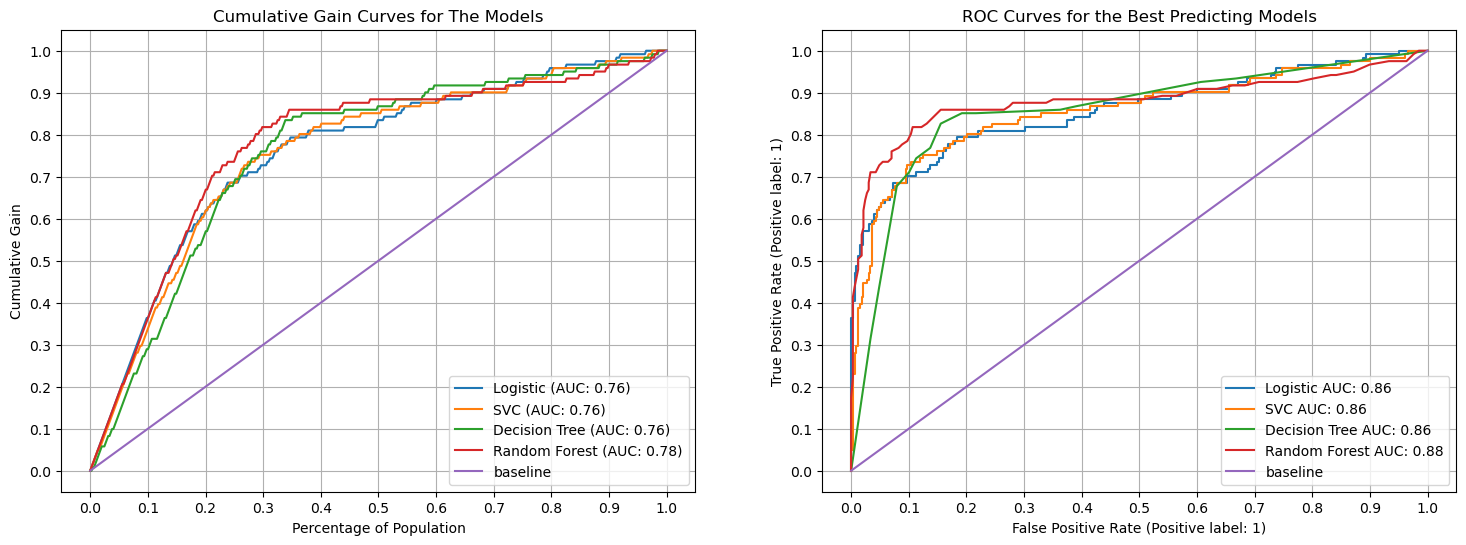

In [176]:
adjusted_metrics(usampling_model_probs, usampling_bmodels)

#### Balancing_Weights Cumulative Gain Curves & ROC Curves

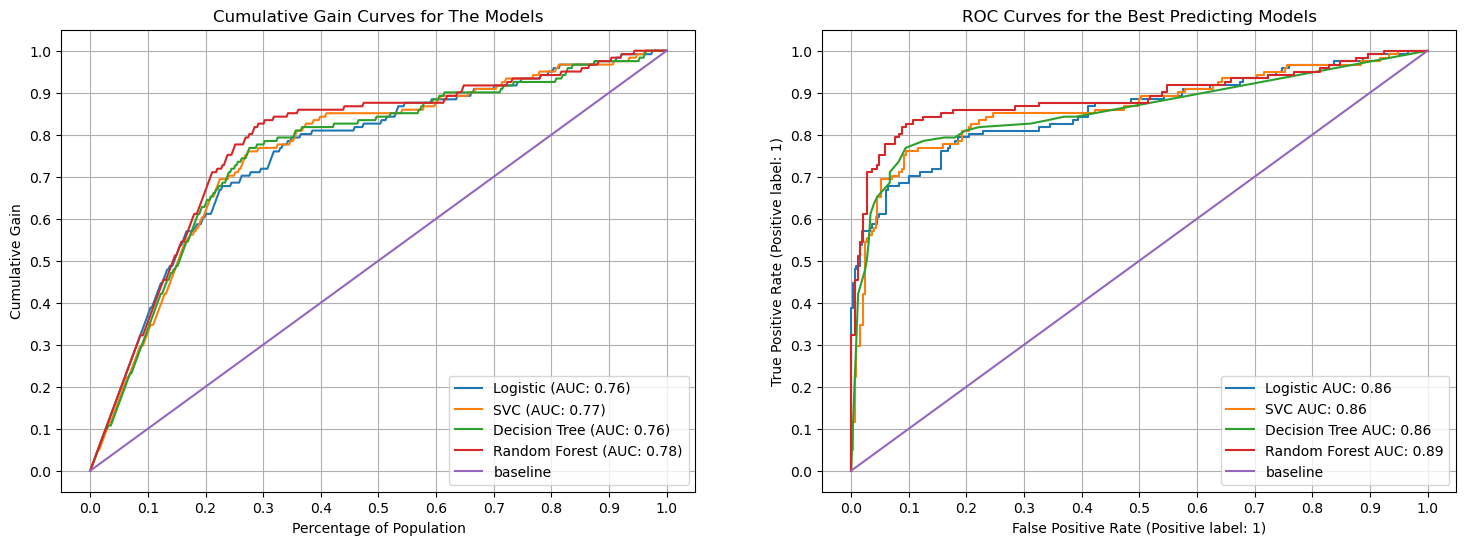

In [178]:
adjusted_metrics(balancing_model_probs, balancing_bmodels)

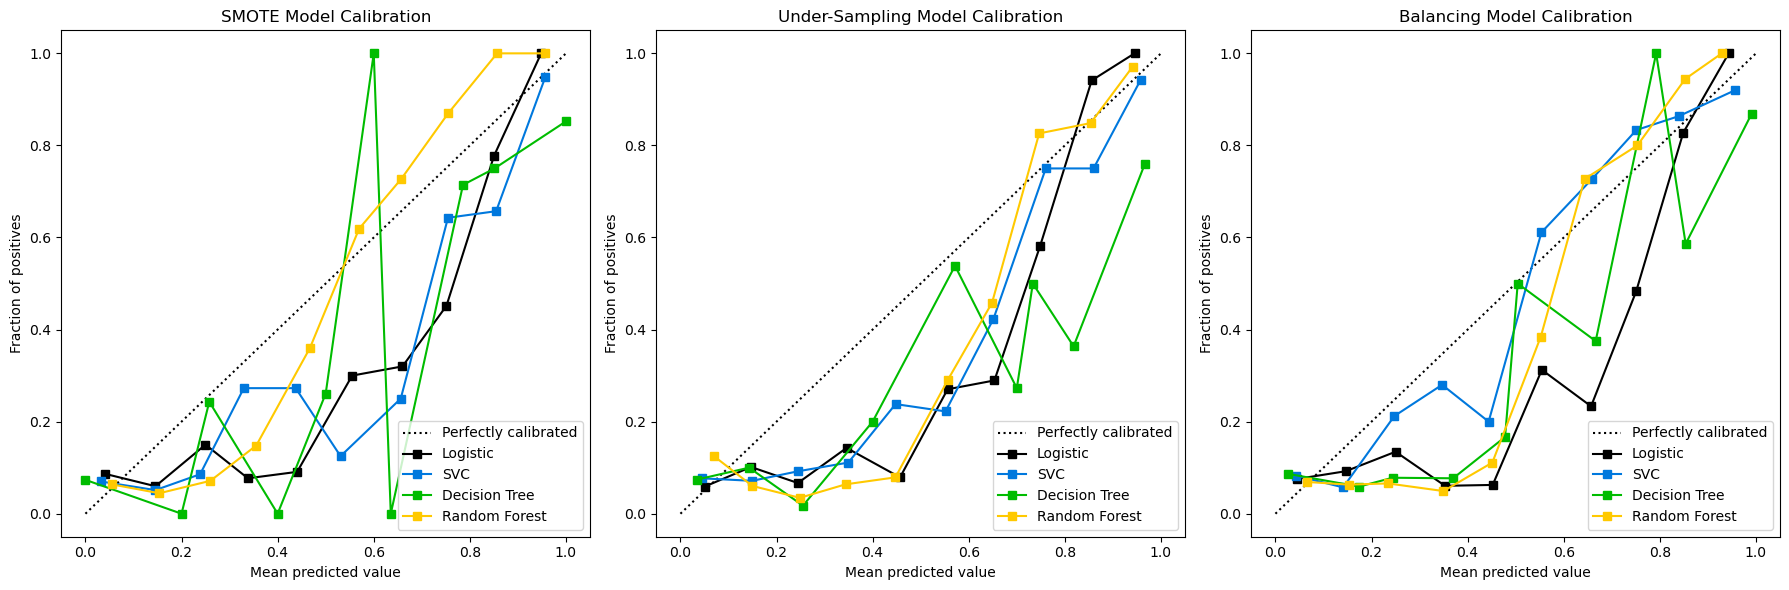

In [180]:
# Calibration curve graphs
# 1x3 grid of subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  

# Plot each calibration curve on its respective subplot
skplt.metrics.plot_calibration_curve(y_test, list(smote_model_probs.values()), list(smote_model_probs.keys()), ax=ax[0])
ax[0].set_title('SMOTE Model Calibration')

skplt.metrics.plot_calibration_curve(y_test, list(usampling_model_probs.values()), list(usampling_model_probs.keys()), ax=ax[1])
ax[1].set_title('Under-Sampling Model Calibration')

skplt.metrics.plot_calibration_curve(y_test, list(balancing_model_probs.values()), list(balancing_model_probs.keys()), ax=ax[2])
ax[2].set_title('Balancing Model Calibration')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [204]:
#Function to display Confusion Matrix
def Display_Confusion_Matrix(matrix_info, method):
    #Plotting the Confusion Matrix for all 4 Model as a base to compare
    # 1x4 grid of subplots
    fig, ax = plt.subplots(1, 4, figsize=(18, 4))
    fig.suptitle(f'Confusion Matrix for the 4 Models with {method}', fontweight='bold')

    # Confusion Matrix - Looping on the matrix_info
    for i, (model, y_preds) in enumerate(matrix_info.items()):
        # Calculating the values
        conf_matrix = confusion_matrix(y_test, y_preds[0])

        # Display the confusion matrix
        disp = ConfusionMatrixDisplay(conf_matrix)
        
        ax[i].set_title(model)
        disp.plot(ax=ax[i], cmap='Blues')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

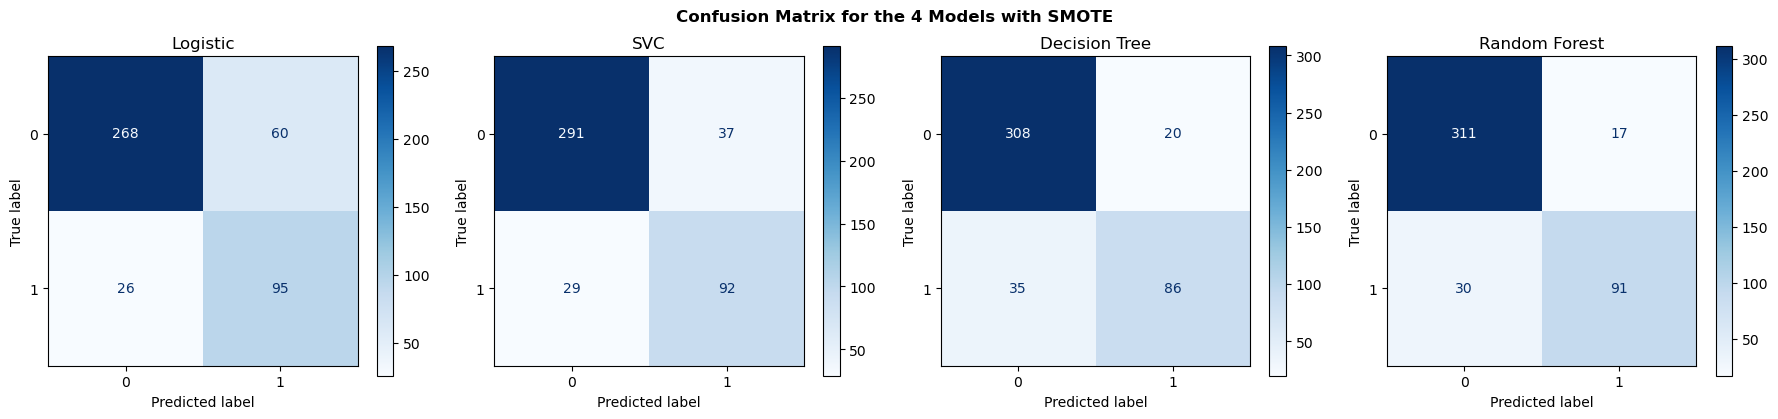

In [206]:
Display_Confusion_Matrix(smote_graph_pies, 'SMOTE')

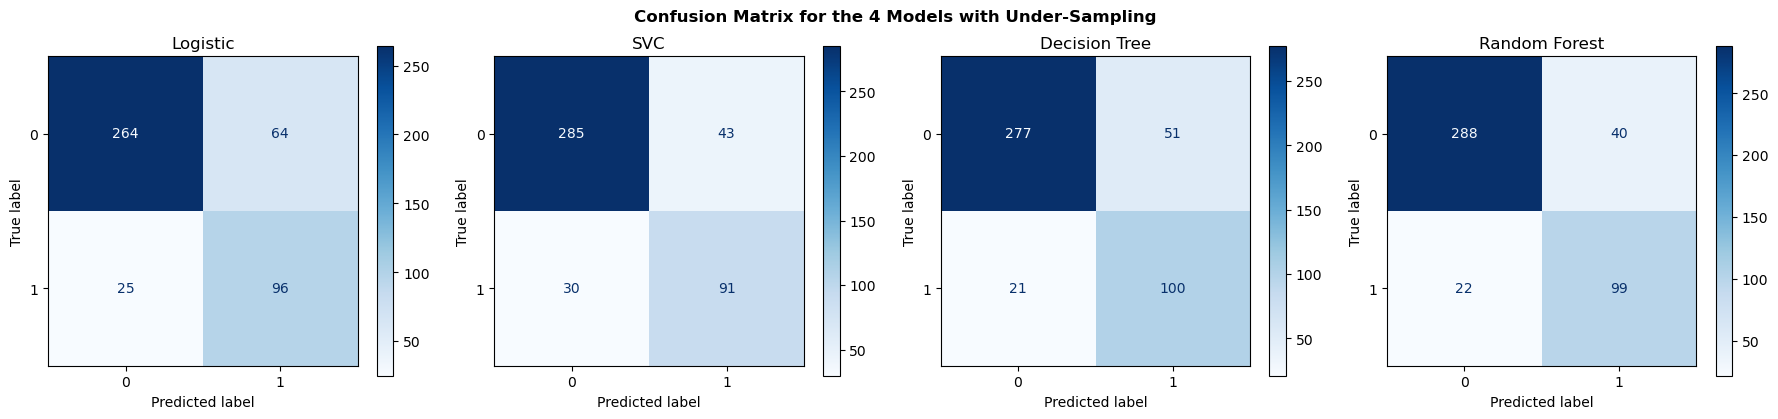

In [208]:
Display_Confusion_Matrix(usampling_graph_pies, 'Under-Sampling')

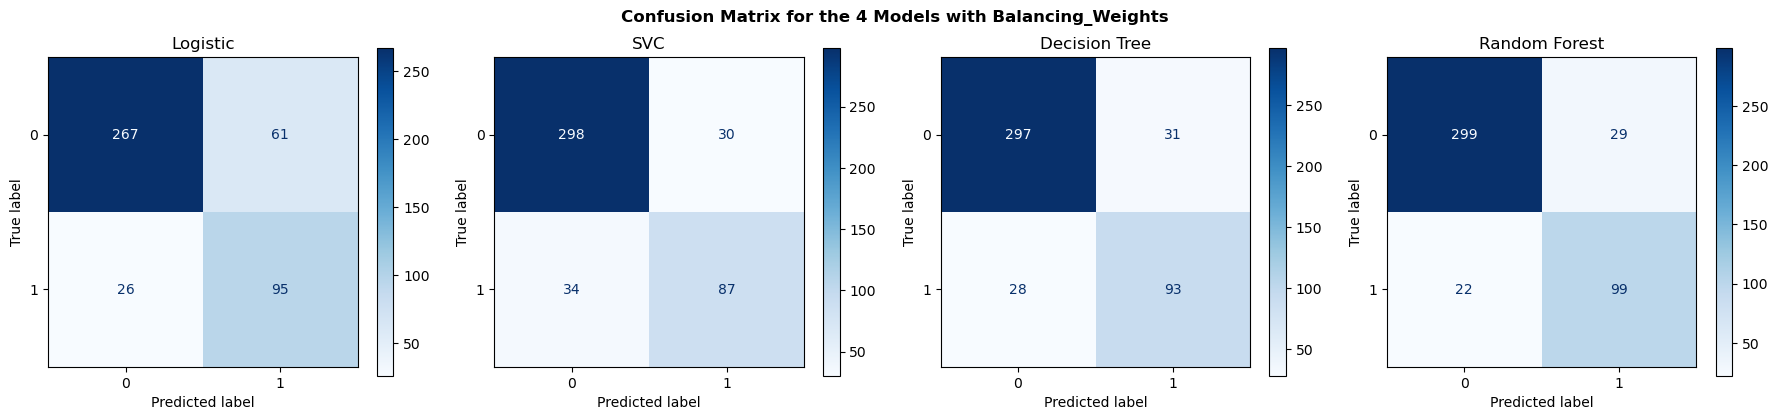

In [210]:
Display_Confusion_Matrix(balancing_graph_pies, 'Balancing_Weights')

### Conclusions and Deployment:

### Data:
The dataset is sourced from Kaggle.
Link: https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data

This dataset provides insights into factors influencing hiring decisions. Each record represents a candidate with various attributes considered during the hiring process including ethnicity.

The imbalance in ethnicity within the dataset introduces a bias, disproportionately affecting minority groups' chances of being hired. This underrepresentation may lead the model to favor the majority group, ultimately reducing fairness in hiring predictions.

### Business Objective:

Reduce the bias in the models against Black and Hispanic in the hiring process without sacrificing quality.

### Baseline:

The base model is Logistic Regression with default parameters, it has an accuracy of 0.81.
Compared with the original data the number of Black and Hispanic people went from 5.0% to 5.8% and 7.0%% to 7.1% showing an increase of 0.8% and 0.1 respectively for each ethnicity.

The second model combines Logistic Regression with LASSO regularization has an accuracy 0.81, and an increase in the Back and Hispanic participation of 0.8% and 0.7% as shown in the graph below. Also train data shows how the model can reduce the participation of the Hispanic people by 0.6%.

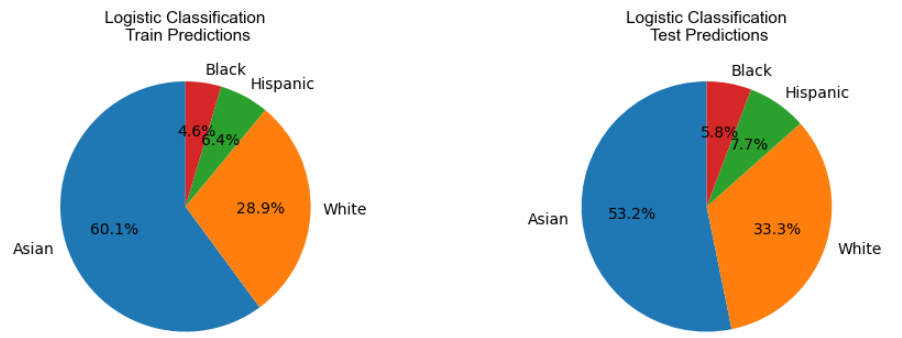

### Techniques to Handle Imbalanced Classes

There are 3 major techniques in this project to work with the unbalanced dataset: 

   - Oversampling the minority class using SMOTE
   - Undersampling the majority class with RandomUnderSampler
   - Adjusting Class Weights as a parameter for the model

These 3 balancing methods are used with 4 algorithms:
    - LogisticRegression 
    - SVC 
    - DecisionTreeClassifier
    - RandomForest 
    therefore there are 12 models 

### Comparing models 

1. Running the models with SMOTE - Synthetic Minority Over-sampling Technique - the results are:
   - Random forest has the highest ROC value of 0.89 followed by SVC with 0.87
   - Random forest accuracy 0.90, SVC accuracy 0.85
   - The fastest model was Logistic Regression with 0.008

    The graphic below shows metrics comparison for the models with SMOTE 
   
    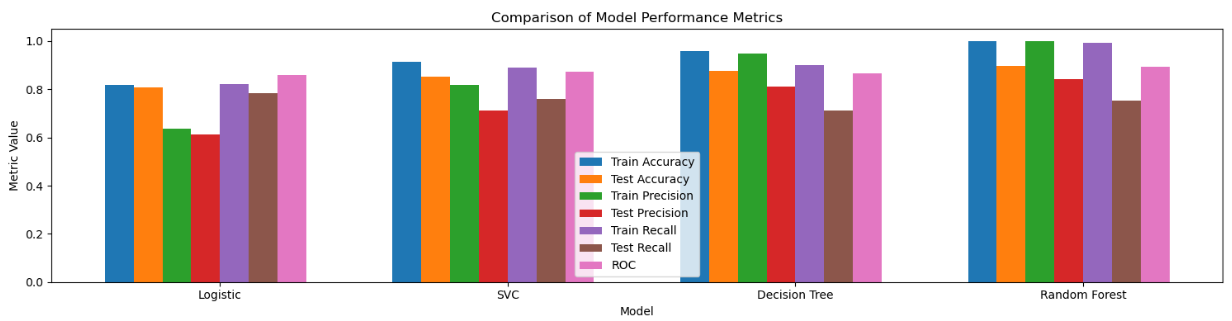

    According to these results, SMOTE did not sacrifice the performance of the model and the Black and Hispanic hired people increased from 5.0% to 6.2% and 7.0% to 9.3% on the SVC respectively. **The increase was even better on the Decision Tree Classifier model Black hired people increase on 2.5% to 7.5% and Hispanic on 4.3% to 11.3%**

    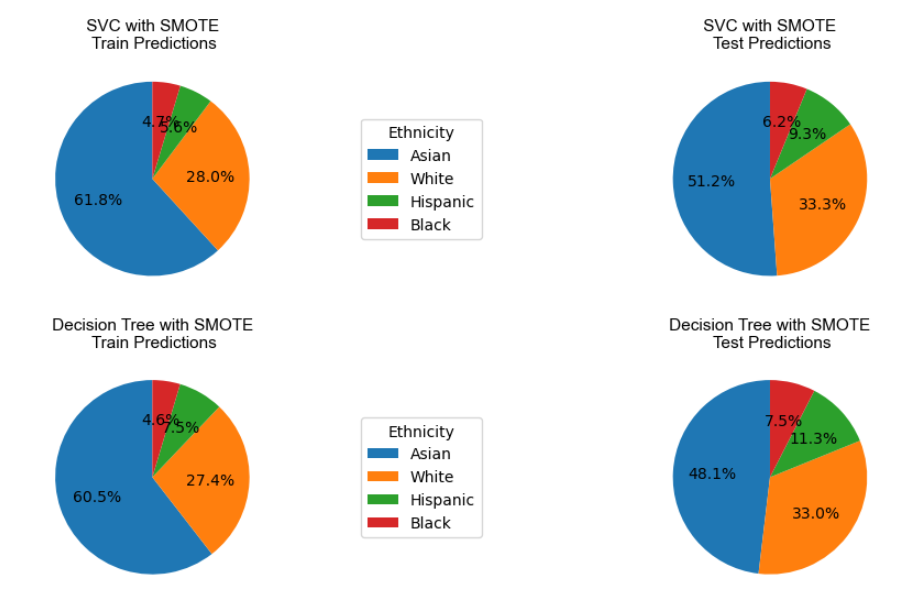

3. Under-Sampling - RandomUnderSampler. These are the results for this technique:
    - Random forest has the highest ROC value of 0.88 followed by Logistic Regression with 0.86
    - Random forest accuracy 0.86, Logistic Regression accuracy 0.80
    - The fastest model was Decision Tree with 0.003

    The graphic below shows metrics comparison for the models with Under-Sampling 

    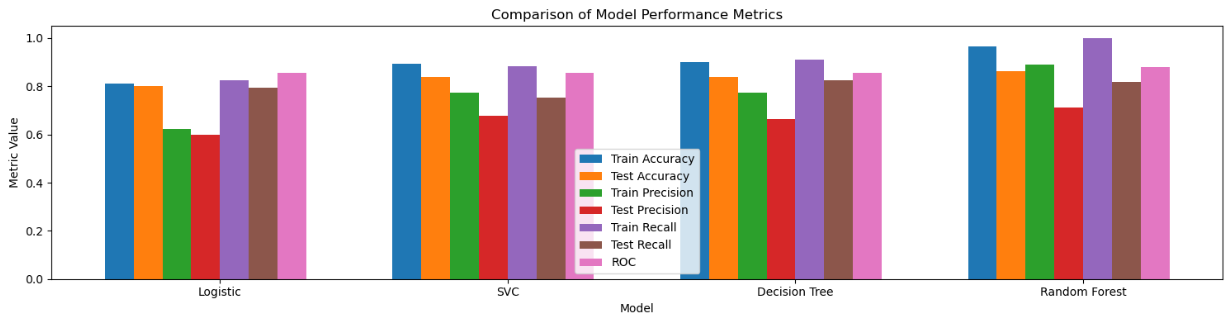

    **Under-Sampling results showed great performance in all models, and Black and Hispanic hired people increased from 5.0% to 6.5% and 7.0% to 10.1% respectively with Random Forest.** The Decision Tree Classifier showed an increase of 2.7% for Black candidates to 7.9% and 2.3% for Hispanic to 9.3%

    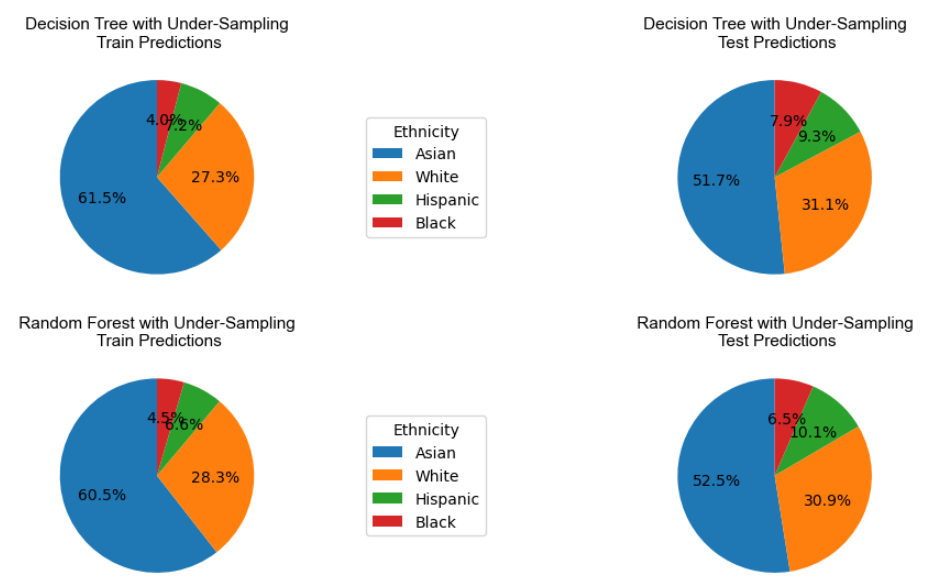

3. Balancing Weights all 4 algorithms used accept the parameter class_weight set to ‘balanced’ here are the results:
   - Random forest has the highest ROC value of 0.89 followed by SVC with 0.86
   - Random forest accuracy 0.89, SVC accuracy 0.86
   - The fastest model was Decision Tree Classification with 0.003

    The graphic below shows metrics comparison for the models with Balancing Weights 

    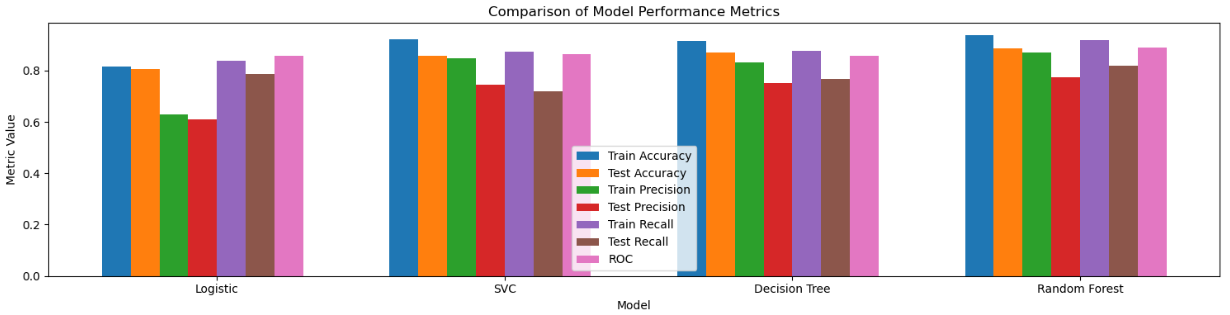

    Logistic Regression showed the biggest increase fo Black and Hispanic candidates with 6.4% and 9.0%, these results showed that for increasing the participation of Black and Hispanic candidates and in general underrepresented classes it is better to combine this method with a resampling technique. 

    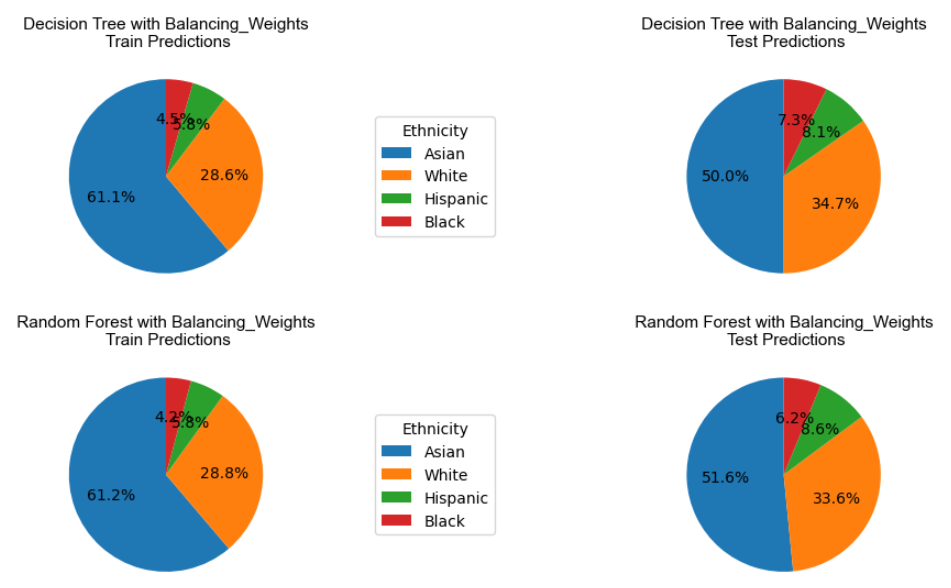
    
### Permutation importance
This machine learning technique is used to assess the importance of individual features within a model by randomly shuffling the values of a single feature and observing how much the model's performance degrades. 

The graphs below show that the resampling or balancing of the data did not affect the importance of the features (SMOTE). 

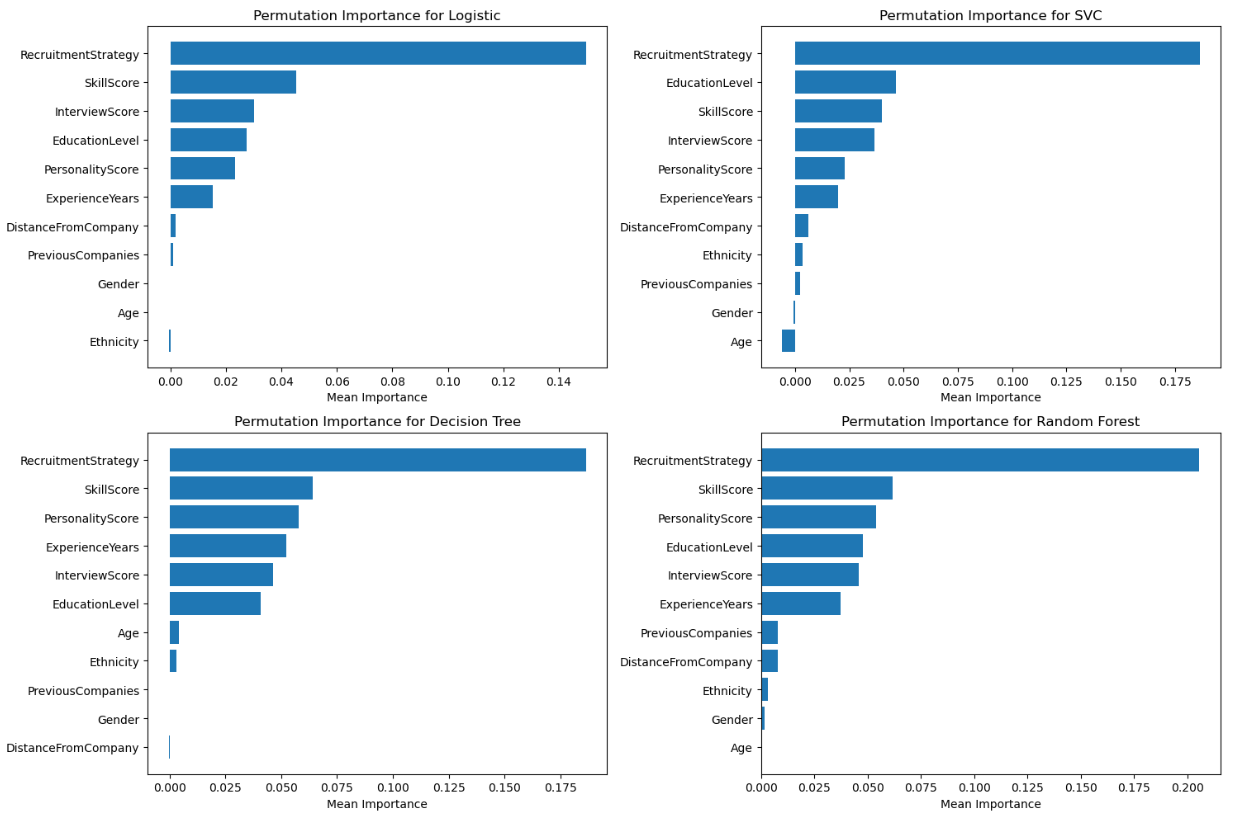

### Adjusting the performance metrics

The Cumulative Gain Curve shows how well the model can rank instances in order of their likelihood to respond positively (e.g., get hired).

On the other hand The ROC Curve (Receiver Operating Characteristic curve) is a useful metric for marketing campaigns in classification models because it helps evaluate the model's ability to distinguish between classes (e.g., potential hires vs no-hires) across different decision thresholds. Here’s why the ROC is valuable in this context.

The ROC curve plots the True Positive Rate (TPR) (also called sensitivity or recall) against the False Positive Rate (FPR) at various classification thresholds.

Next, The Lift Curve is derived from the cumulative gains chart; the values on the y axis correspond to the ratio of the cumulative gain for each curve to the baseline. Thus, the lift at 10% for the category Yes is 50%/10% = ~5.0 for most models. It provides another way of looking at the information in the cumulative gains chart.

SMOTE
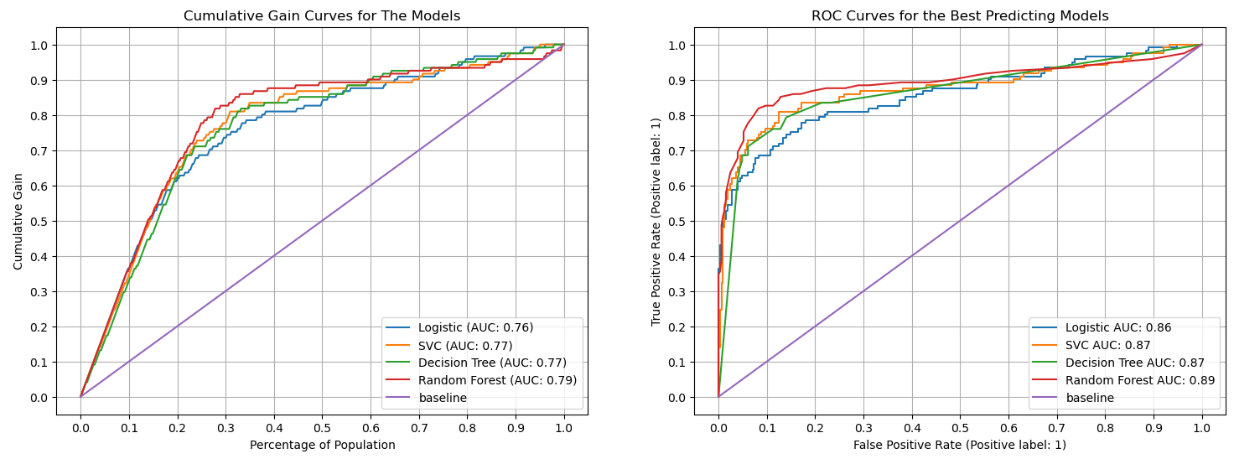

Plotting The Calibration Curves of a classifier is useful for determining whether or not you can interpret their predicted probabilities directly as a confidence level. For instance, a well-calibrated binary classifier should classify the samples such that for samples to which it gave a score of 0.8, around 80% should actually be from the positive class.

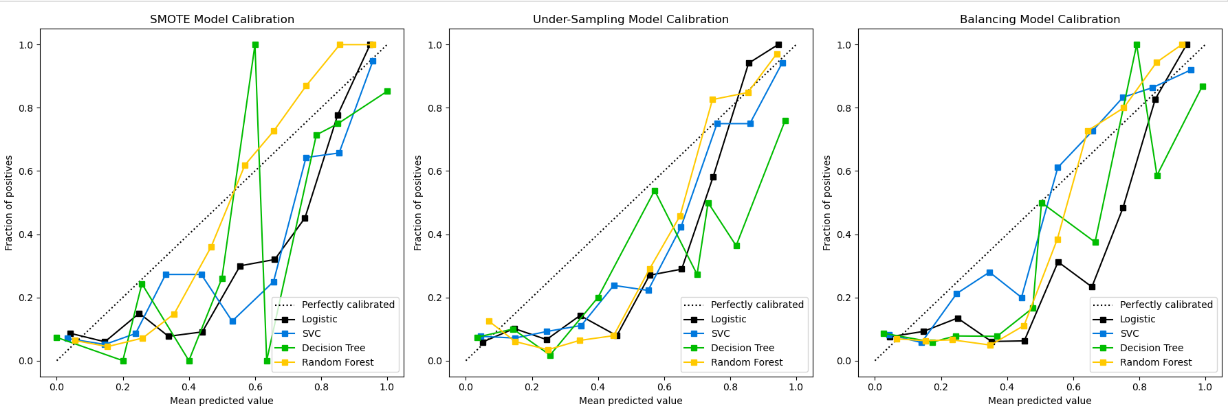
    
Finally The Confusion Matrix for each model shows the values for TP, FP and FN, in this case the idea is to increase the number of people in the campaign that will say Yes and reduce the number of calls.

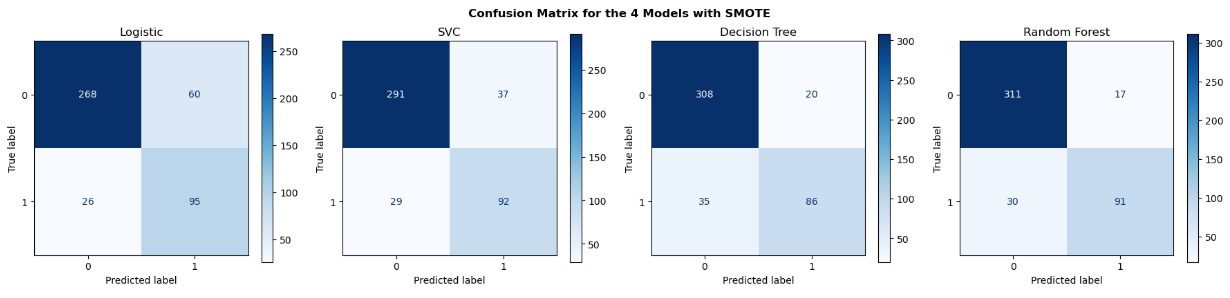
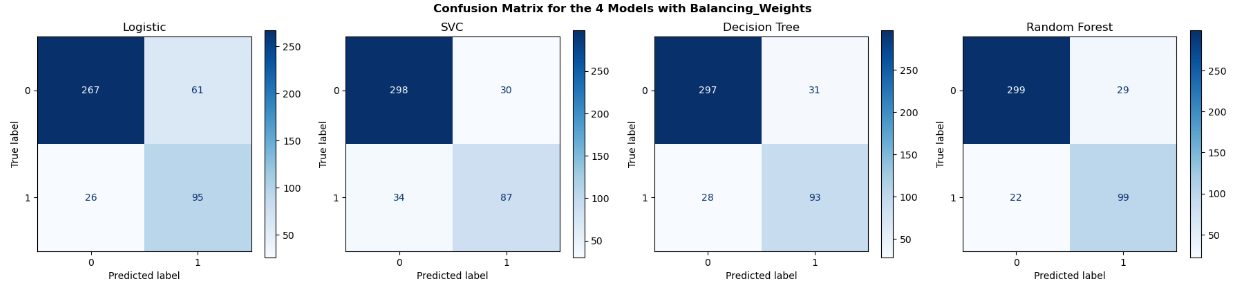
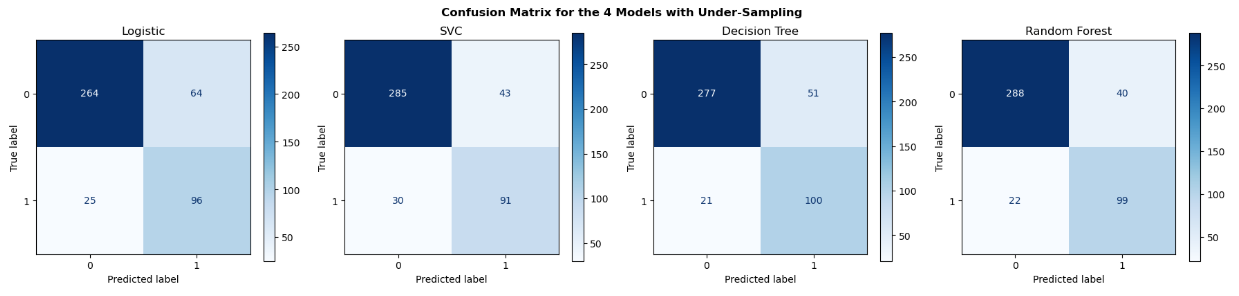


### Next Steps and Recommendations
 
- There are balancing methods that could be tested such as Adaptive Synthetic Sampling (ADASYN) 
- Include other minorities such as gender and age
- One of the algorithms to try should be the Upper Confidence Bound - Bandit
  
    - Contextual bandit problems are originally motivated by applications in clinical trials (Woodroofe, 1979). When a standard treatment and a new treatment are available for a certain disease, the doctor needs to decide, in a sequetial manner, which of them to use based on the patient’s profiles such as age, general physical status or medicine history and picked back around 2012 on web search.
  
    - To implement an Upper Confidence Bound (UCB) contextual bandit model in a hiring process where the goal is to explore more opportunities for underrepresented groups (e.g., Black and Hispanic applicants), you can structure the model to take into account both the historical performance of hiring outcomes and the need for increased exploration for specific classes.
  
- Since most ATS systems have the ML models at the beginning of the funnel, it would be interesting to run these models with a dataset of selection for interview, and track the people hired at end. 
- Tunning the algorithms and research on some of the behaiviors such the the one for decision tress classification in the calibrarion graphic for SMOTE models
